In [3]:
%load_ext autotime
%config IPCompleter.greedy=True

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.1 ms (started: 2023-12-15 16:31:40 +05:30)


In [4]:
if True:
    import warnings
    warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from prettytable.colortable import ColorTable, Themes



time: 1.84 ms (started: 2023-12-15 16:31:40 +05:30)


In [5]:
PROJECT_DIR = Path(globals()['_dh'][0])
# PROJECT_DIR = BASE_DIR / 'MyDrive' / 'COLLEGE_FINAL_YEAR_PROJECT'
MODELS_DIR = PROJECT_DIR / 'models'
DATASETS_DIR = PROJECT_DIR / 'datasets'
DATA_DIR = PROJECT_DIR / 'data'

PROJECT_DIR.mkdir(exist_ok=True)
MODELS_DIR.mkdir(exist_ok=True)
DATASETS_DIR.mkdir(exist_ok=True)
DATA_DIR.mkdir(exist_ok=True)

features = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "intrusion_type",
]

time: 1.83 ms (started: 2023-12-15 16:31:40 +05:30)


In [6]:
read_csv_kwargs = {
    'filepath_or_buffer': DATASETS_DIR / 'kddcup' / 'kddcup.data_10_percent.gz',
    'compression': 'gzip',
    'names':features,
    'header': None
}
data = pd.read_csv(**read_csv_kwargs)
data.tail()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
494016         0           tcp    http   SF        310       1881     0   
494017         0           tcp    http   SF        282       2286     0   
494018         0           tcp    http   SF        203       1200     0   
494019         0           tcp    http   SF        291       1200     0   
494020         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
494016               0       0    0  ...                 255   
494017               0       0    0  ...                 255   
494018               0       0    0  ...                 255   
494019               0       0    0  ...                 255   
494020               0       0    0  ...                 255   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
494016                     1.0                     0.0   
494017                     1.0                     0.0   
494018                     1.0                     0.0   
494019                     1.0                     0.0   
494020                     1.0                     0.0   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
494016                         0.01                         0.05   
494017                         0.17                         0.05   
494018                         0.06                         0.05   
494019                         0.04                         0.05   
494020                         0.17                         0.05   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
494016                  0.00                      0.01                   0.0   
494017                  0.00                      0.01                   0.0   
494018                  0.06                      0.01                   0.0   
494019                  0.04                      0.01                   0.0   
494020                  0.00                      0.01                   0.0   

        dst_host_srv_rerror_rate  intrusion_type  
494016                       0.0         normal.  
494017                       0.0         normal.  
494018                       0.0         normal.  
494019                       0.0         normal.  
494020                       0.0         normal.  

[5 rows x 42 columns]

time: 665 ms (started: 2023-12-15 16:31:40 +05:30)


In [7]:
def print_basic_info_table():
    x = ColorTable(theme=Themes.OCEAN)
    x.field_names = ['Rows', 'No. Features']
    x.add_row([data.shape[0], data.shape[1]])
    print(x)
    x.clear()
    x.field_names = ['Some of the features available']
    x.add_row([', '.join(features[:10])])
    print(x)
print_basic_info_table()

+--------+--------------+
|  Rows  | No. Features |
+--------+--------------+
| 494021 |      42      |
+--------+--------------+
+-------------------------------------------------------------------------------------------------+
|                                  Some of the features available                                 |
+-------------------------------------------------------------------------------------------------+
| duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot |
+-------------------------------------------------------------------------------------------------+
time: 581 µs (started: 2023-12-15 16:31:41 +05:30)


# List Intrusion Types

In [8]:
labels = set(data['intrusion_type'].values)
print(labels)
print('No. of Intrusion Types', len(labels))

{'nmap.', 'ftp_write.', 'normal.', 'guess_passwd.', 'rootkit.', 'warezmaster.', 'warezclient.', 'spy.', 'smurf.', 'phf.', 'back.', 'perl.', 'satan.', 'portsweep.', 'pod.', 'imap.', 'multihop.', 'loadmodule.', 'ipsweep.', 'neptune.', 'buffer_overflow.', 'teardrop.', 'land.'}
No. of Intrusion Types 23
time: 7.86 ms (started: 2023-12-15 16:31:41 +05:30)


# Clean Data

Checking and cleaning data of
- null values
- duplicates

In [9]:
print('Null values in the dataset are:\n',data.isnull().sum())

Null values in the dataset are:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [10]:
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF.head(5)

duration protocol_type service flag  src_bytes  dst_bytes  land  \
2500         0           tcp    http   SF        307      60990     0   
2864         0           tcp    http   SF        351      11485     0   
2977         0           tcp    http   SF        506       2419     0   
3003         0           tcp    http   SF        319       1374     0   
3130         0           tcp    http   SF        234       1212     0   

      wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
2500               0       0    0  ...                 255   
2864               0       0    0  ...                 255   
2977               0       0    0  ...                 255   
3003               0       0    0  ...                 255   
3130               0       0    0  ...                 255   

      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
2500                     1.0                     0.0   
2864                     1.0                     0.0   
2977                     1.0                     0.0   
3003                     1.0                     0.0   
3130                     1.0                     0.0   

      dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
2500                          0.0                          0.0   
2864                          0.0                          0.0   
2977                          0.0                          0.0   
3003                          0.0                          0.0   
3130                          0.0                          0.0   

      dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
2500                   0.0                       0.0                   0.0   
2864                   0.0                       0.0                   0.0   
2977                   0.0                       0.0                   0.0   
3003                   0.0                       0.0                   0.0   
3130                   0.0                       0.0                   0.0   

      dst_host_srv_rerror_rate  intrusion_type  
2500                       0.0         normal.  
2864                       0.0         normal.  
2977                       0.0         normal.  
3003                       0.0         normal.  
3130                       0.0         normal.  

[5 rows x 42 columns]

time: 207 ms (started: 2023-12-15 16:31:41 +05:30)


In [11]:
old_shape = data.shape
data.drop_duplicates(subset=features, keep='first', inplace=True)
print('No. of duplicate rows dropped:', old_shape[0] - data.shape[0])

No. of duplicate rows dropped: 348435
time: 179 ms (started: 2023-12-15 16:31:41 +05:30)


In [12]:
data.to_pickle(DATA_DIR / 'data.pkl')
data = pd.read_pickle(DATA_DIR / 'data.pkl')

time: 64.1 ms (started: 2023-12-15 16:31:41 +05:30)


<h2> Exploratory Data Analysis:- </h2>

<h6> Distribution of categories in class label:- </h6>

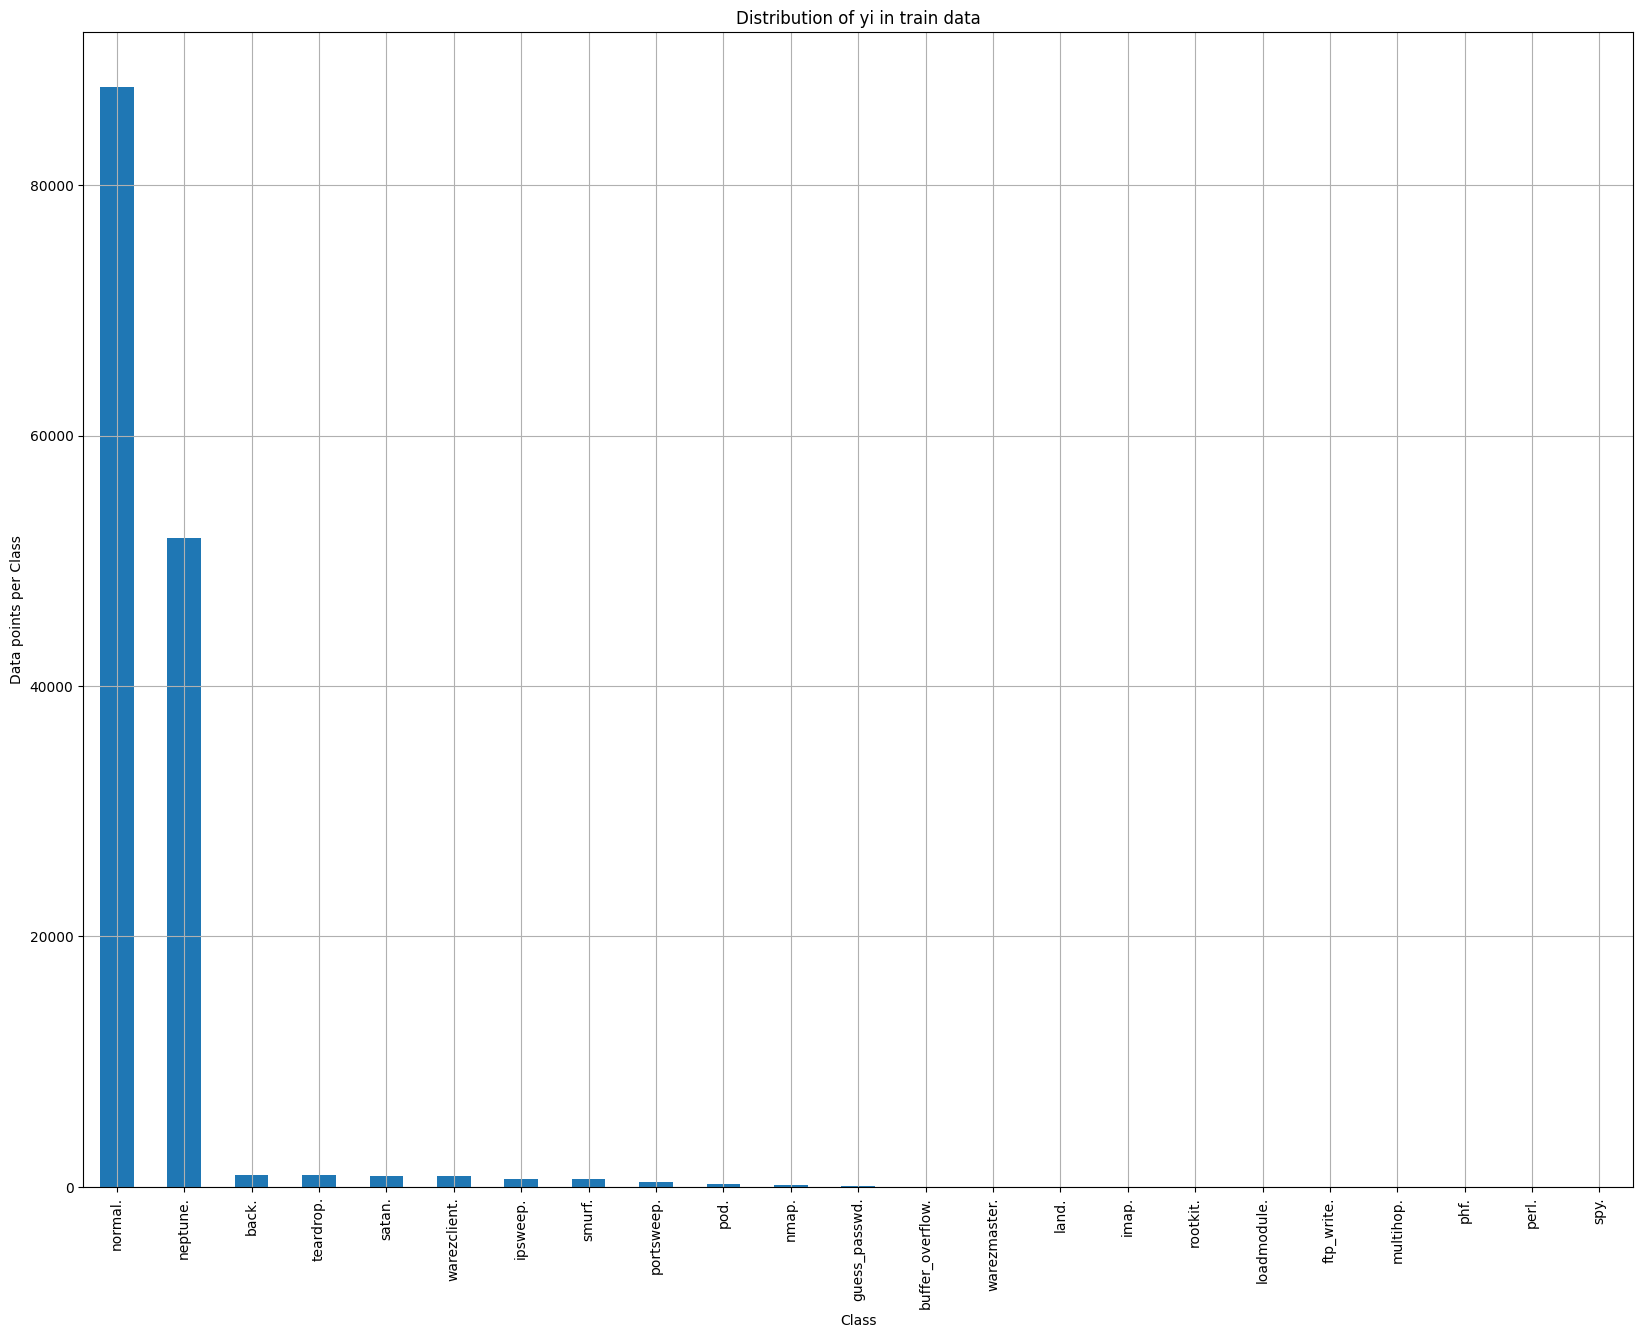

normal. : 87832 ( 60.33 %)
neptune. : 51820 ( 35.594 %)
back. : 968 ( 0.665 %)
teardrop. : 918 ( 0.631 %)
satan. : 906 ( 0.622 %)
warezclient. : 893 ( 0.613 %)
ipsweep. : 651 ( 0.447 %)
smurf. : 641 ( 0.44 %)
portsweep. : 416 ( 0.286 %)
pod. : 206 ( 0.141 %)
nmap. : 158 ( 0.109 %)
guess_passwd. : 53 ( 0.036 %)
buffer_overflow. : 30 ( 0.021 %)
warezmaster. : 20 ( 0.014 %)
land. : 19 ( 0.013 %)
imap. : 12 ( 0.008 %)
rootkit. : 10 ( 0.007 %)
loadmodule. : 9 ( 0.006 %)
ftp_write. : 8 ( 0.005 %)
multihop. : 7 ( 0.005 %)
phf. : 4 ( 0.003 %)
perl. : 3 ( 0.002 %)
spy. : 2 ( 0.001 %)
time: 222 ms (started: 2023-12-15 16:31:41 +05:30)


In [13]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print(class_distribution.index[i], ':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')



- The dataset is highly imbalanced, thus we will need to build a model that should be able to classify data points from these low distribution classes accurately.

<h2> Performance metrics for the problem:- </h2>

### Addressing Dataset Imbalance for Intrusion Detection

- The imbalanced nature of the dataset necessitates the development of a robust model capable of accurately classifying INTRUSION categories.

- To assess model performance, we will employ the CONFUSION MATRIX, which provides insights into the classification effectiveness across the 23 classes.

- In addition to the confusion matrix, precision, recall, and weighted f1-score will be computed to identify the optimal model for handling imbalanced data.

- While acknowledging the limitations of accuracy in imbalanced datasets, an accuracy score will be presented to estimate the overall number of correctly classified points.

- For a more nuanced evaluation, the True Positive Rate (TPR) and False Positive Rate (FPR) scores will be considered, providing additional insights into model performance. ( we want our FPR to be as low as possible )


# (I) MultiClass Classification Problem :-

### Univariate Analysis:-

#### 1. src_bytes:-

In [14]:
import seaborn as sns

time: 279 ms (started: 2023-12-15 16:31:44 +05:30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

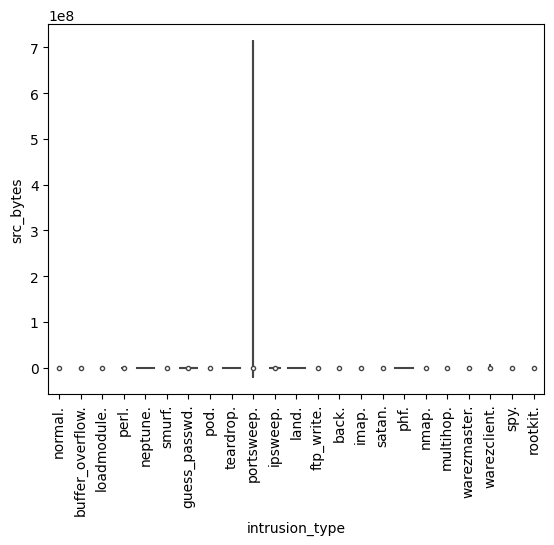

time: 487 ms (started: 2023-12-15 15:33:47 +05:30)


In [14]:
plt.figure()
sns.violinplot(x="intrusion_type", y="src_bytes", data=data)
plt.xticks(rotation=90)

- using `src_bytes` clearly tells that prtsweep is a major contributor in attacks
- As number of classes is high we can not infer much info and must perform Bivariate Analysis

#### Pair Plots for Bivariate Analysis:-

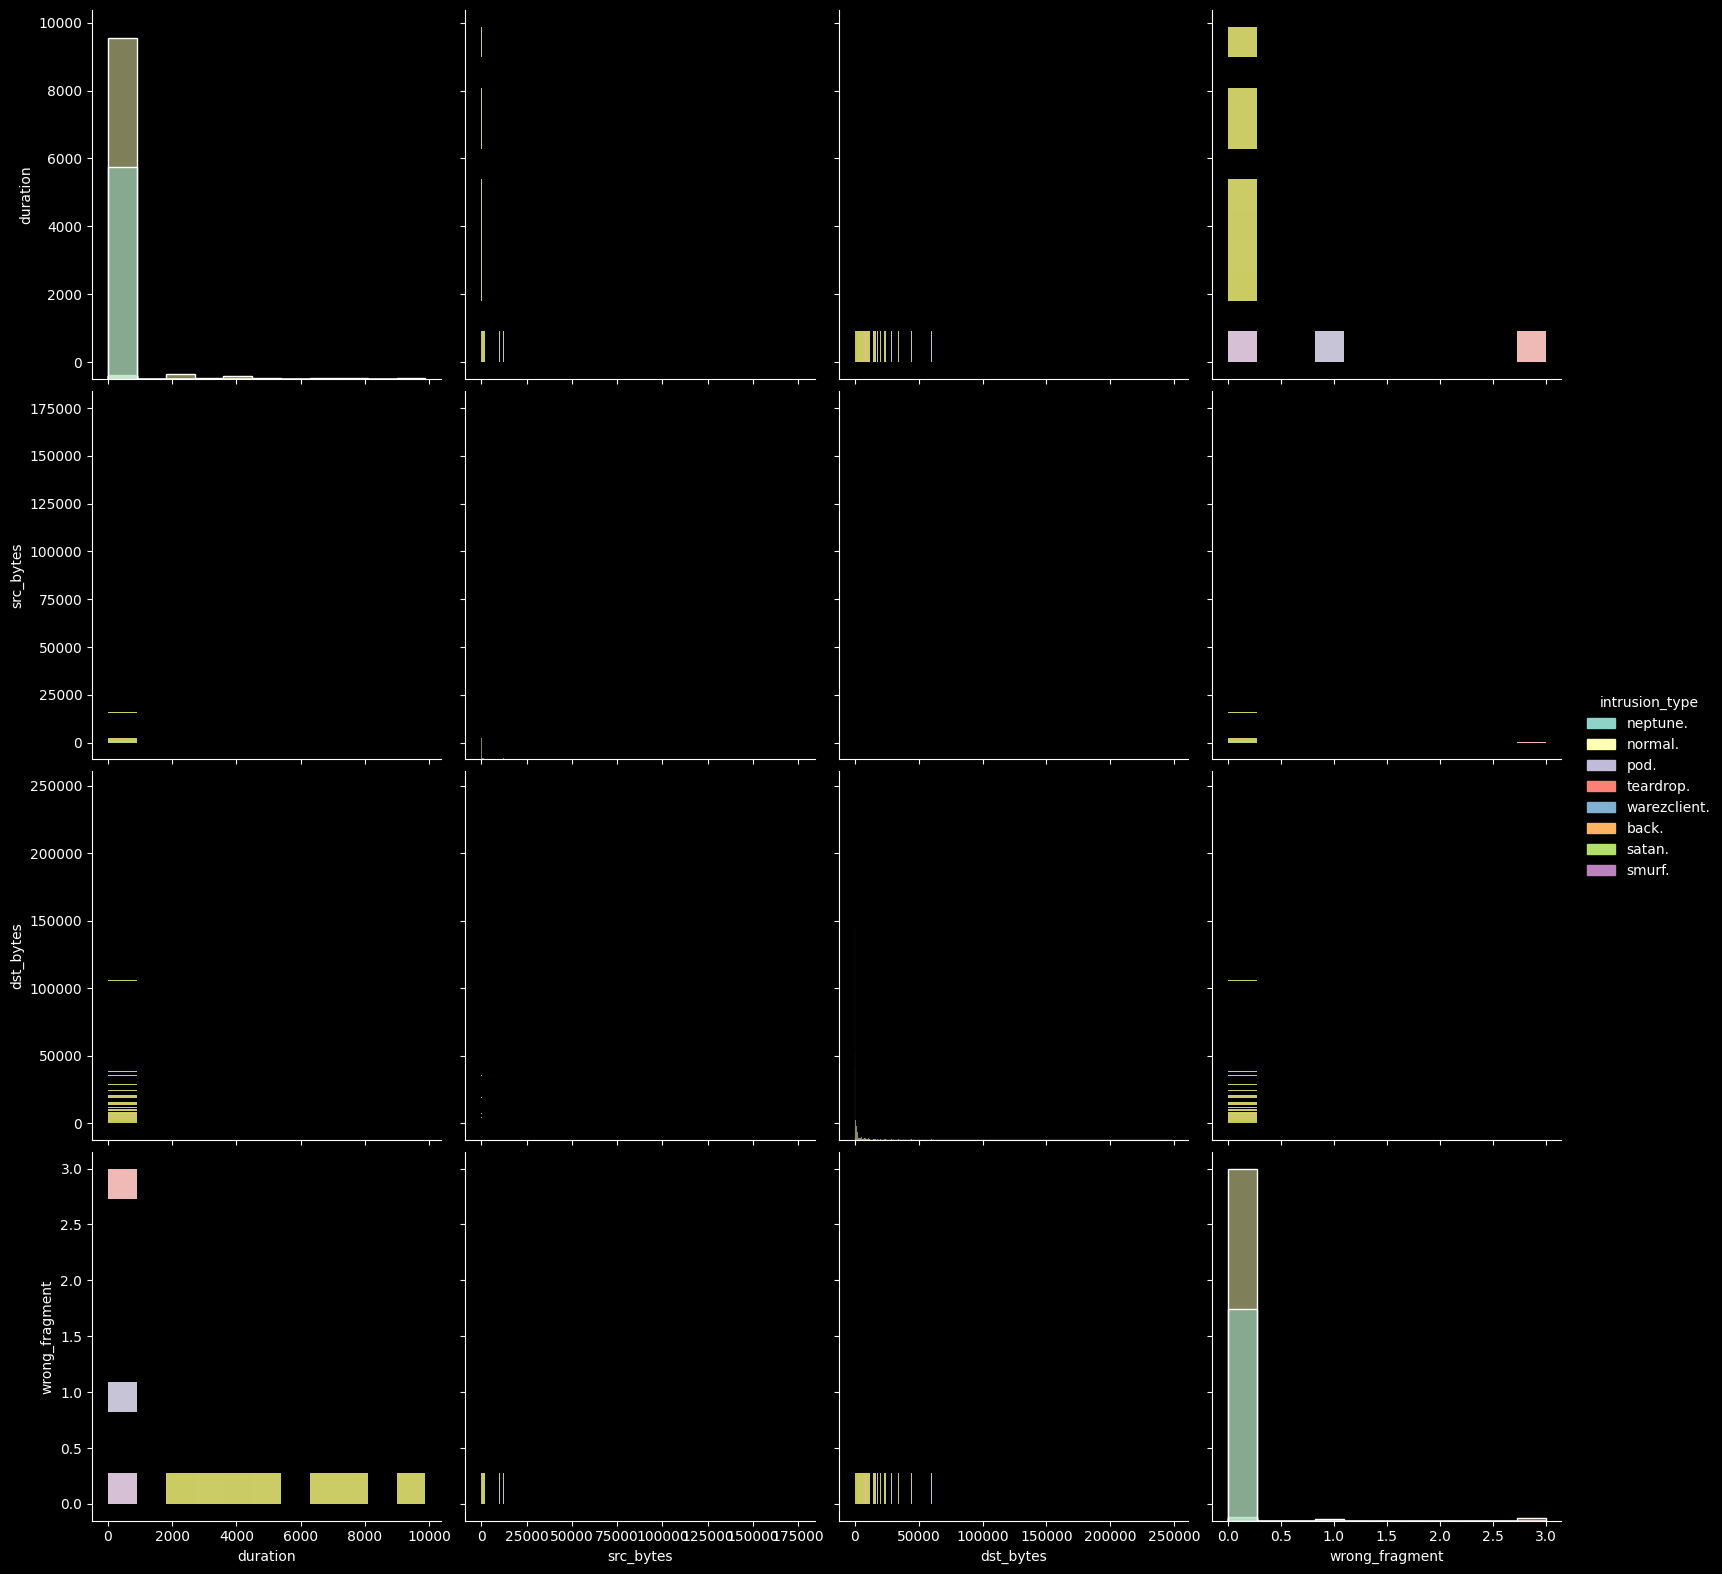

In [ ]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(
        data,
        hue=label,
        height=4,
        kind="hist",
        vars=features,
    )
pairplot(data, 'intrusion_type', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

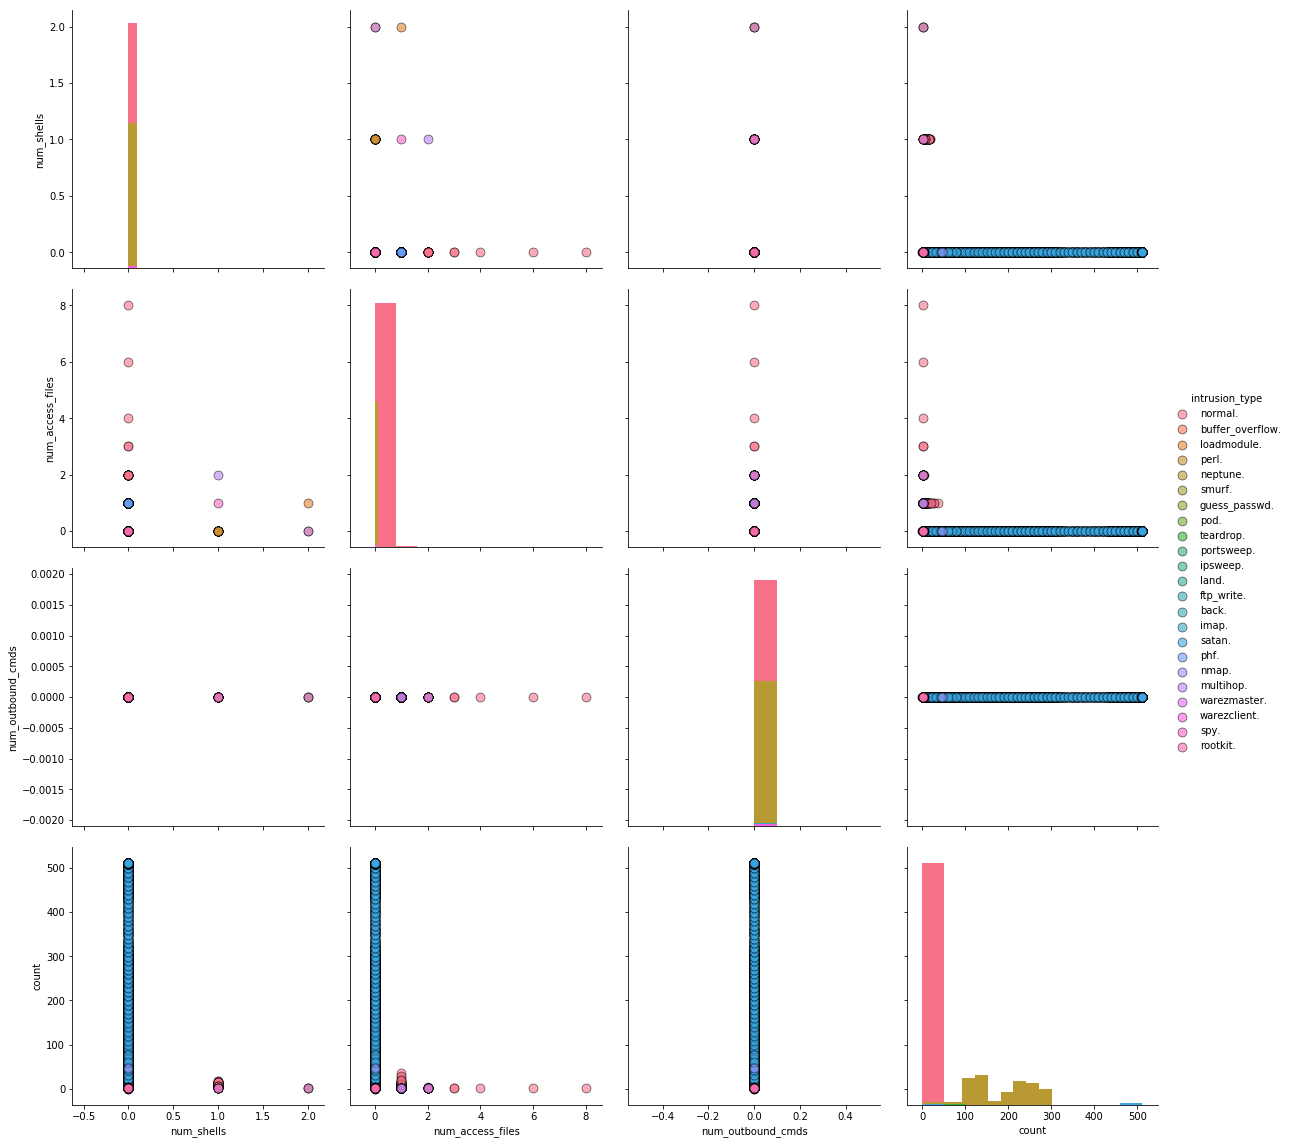

In [ ]:
pairplot(data, 'intrusion_type', features=['num_shells','num_access_files','num_outbound_cmds','count'])

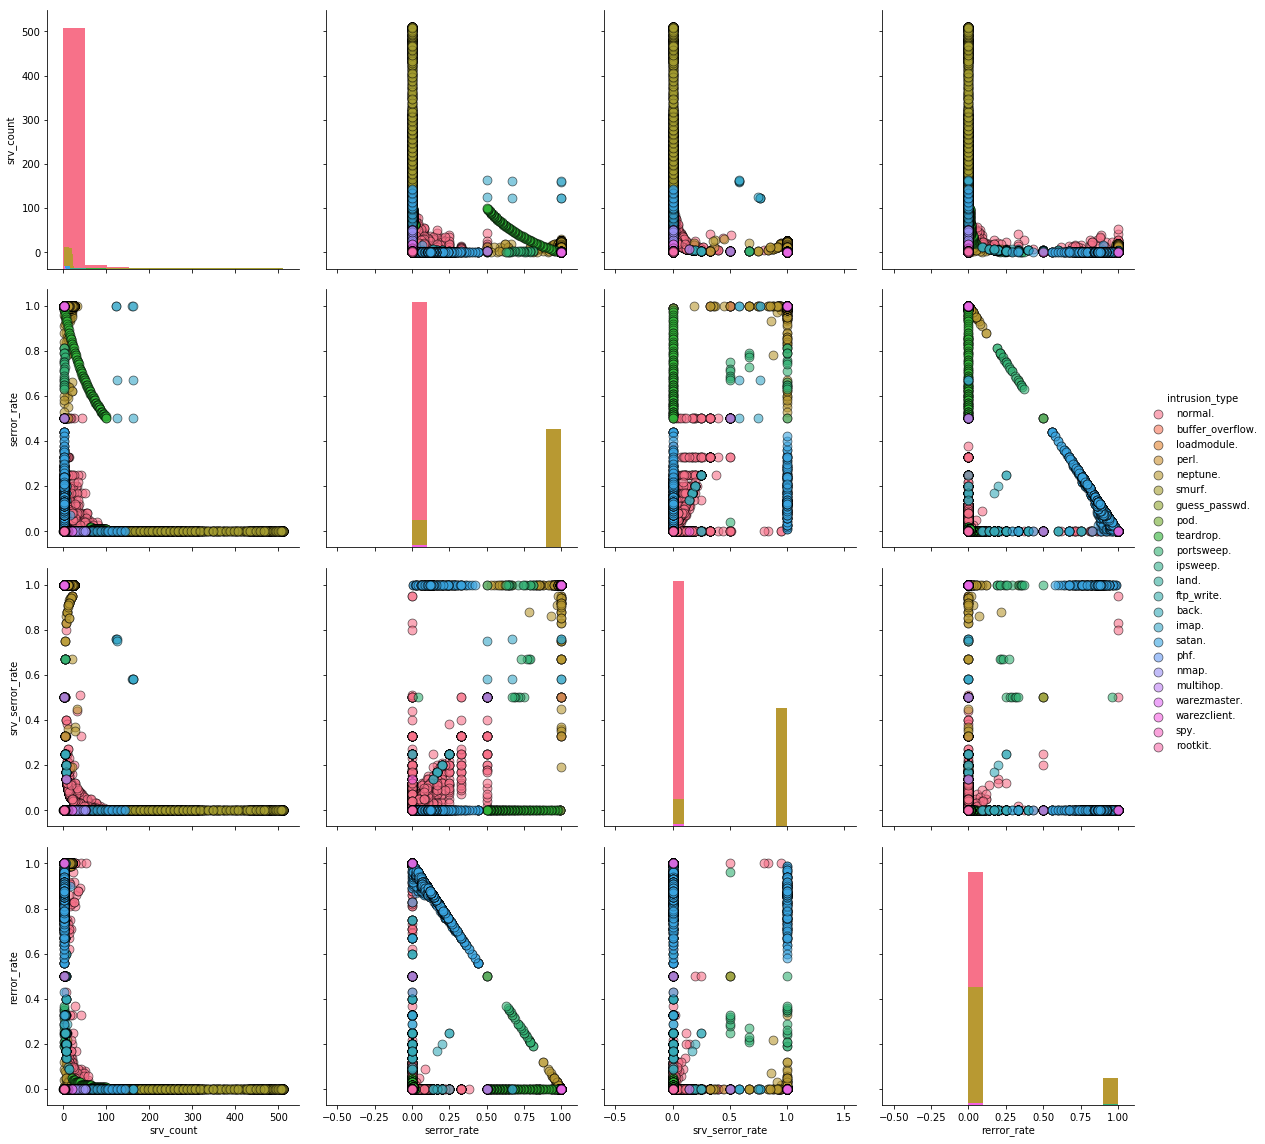

In [ ]:
pairplot(data, 'intrusion_type', features=['srv_count','serror_rate','srv_serror_rate','rerror_rate'])

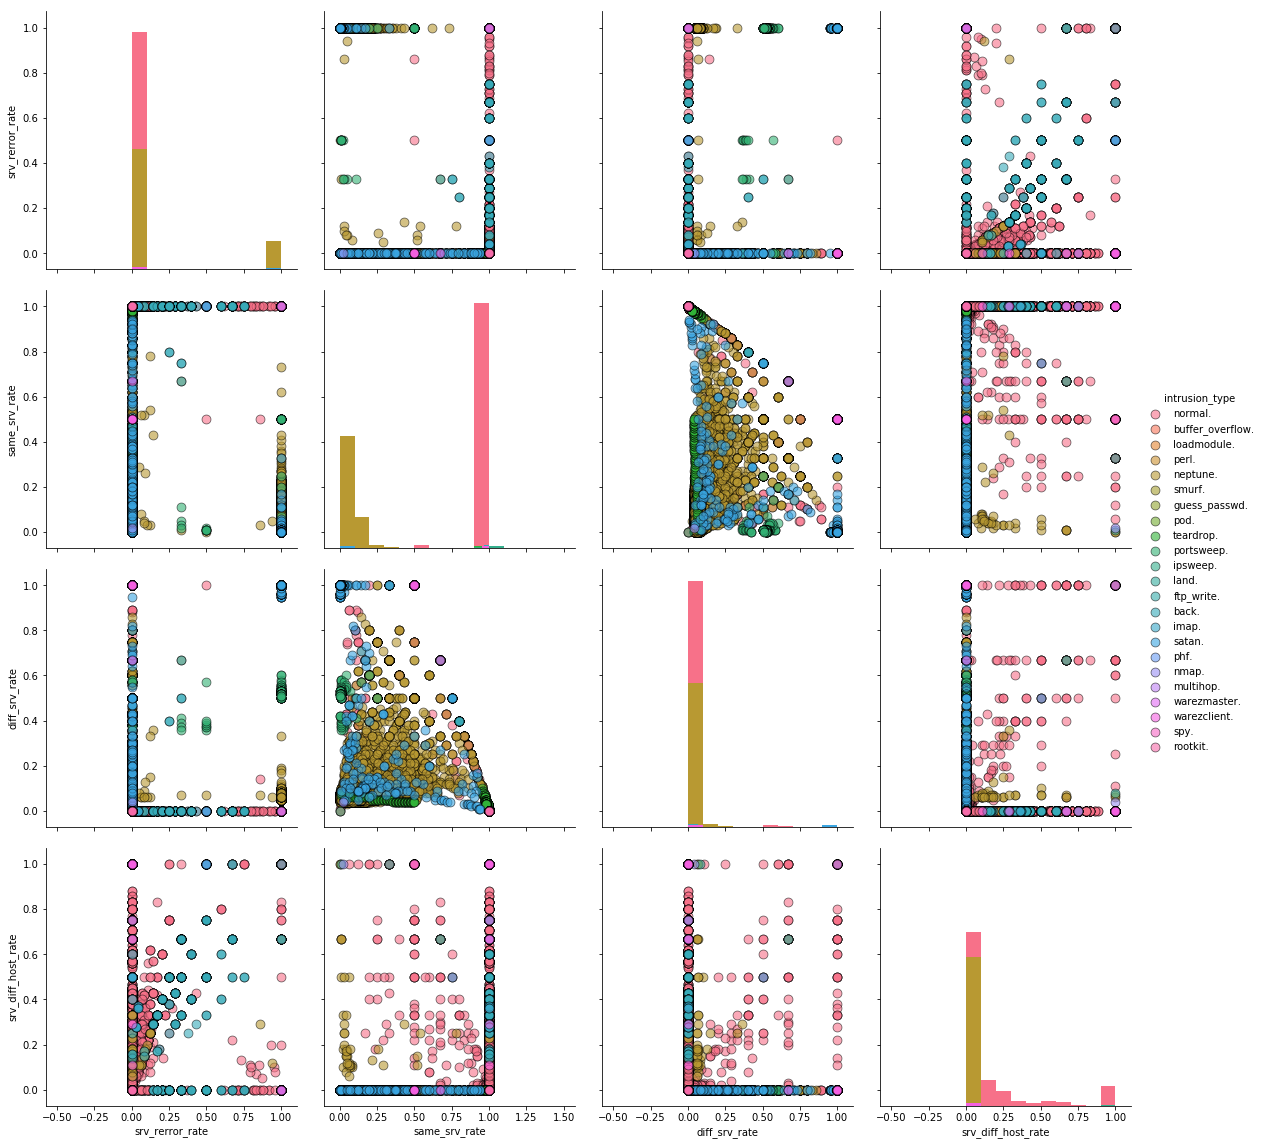

In [ ]:
pairplot(data, 'intrusion_type', features=['srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'])

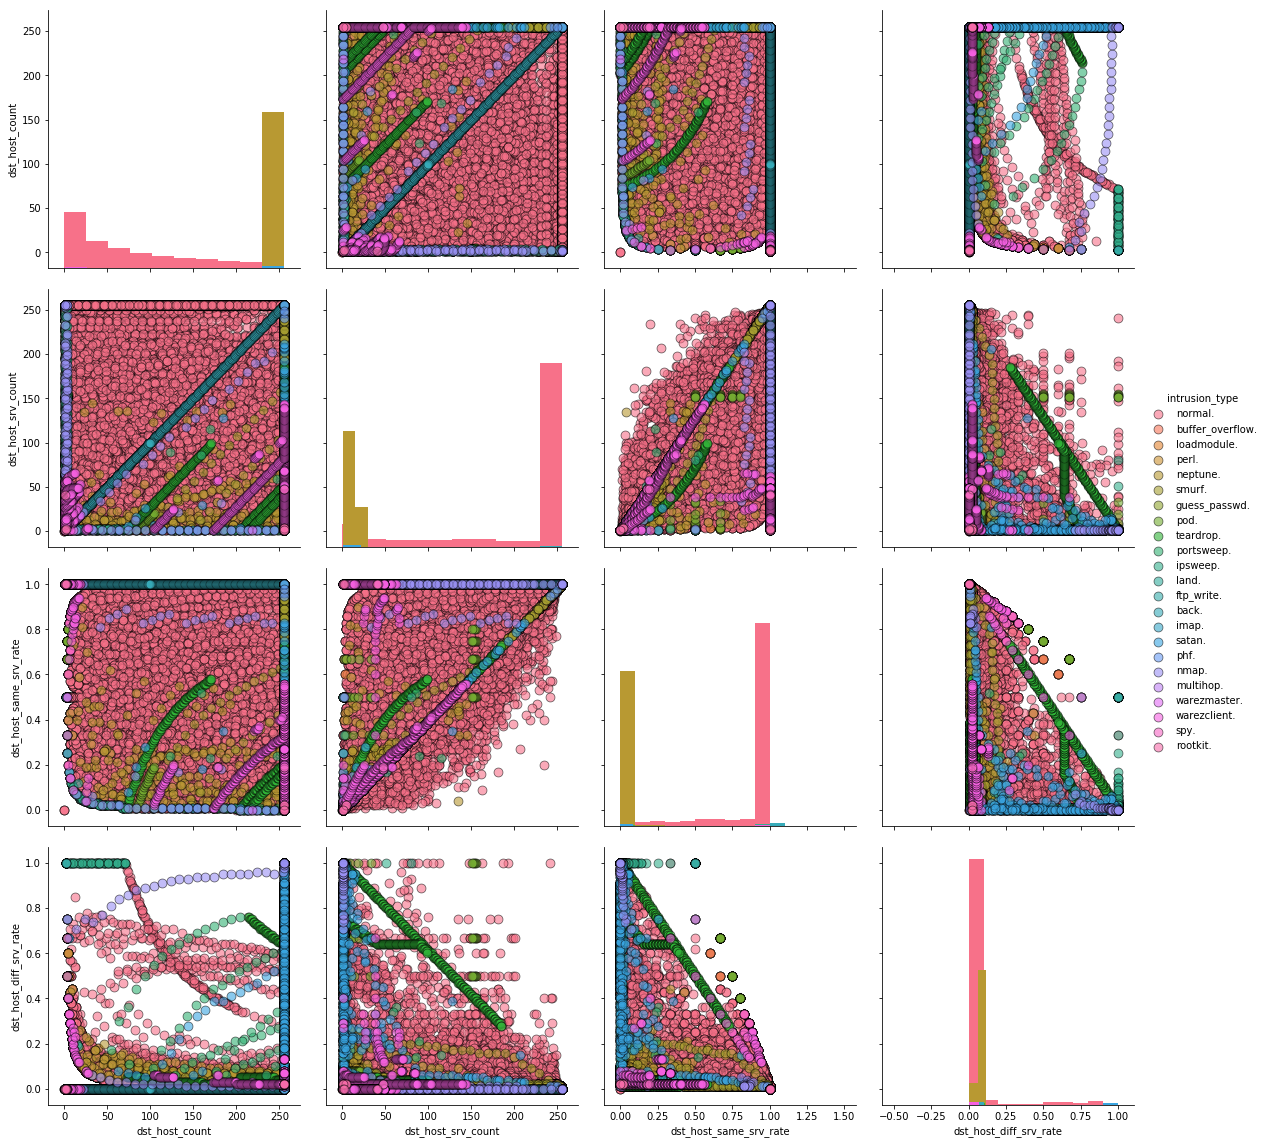

In [ ]:
pairplot(data, 'intrusion_type', features=['dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'])

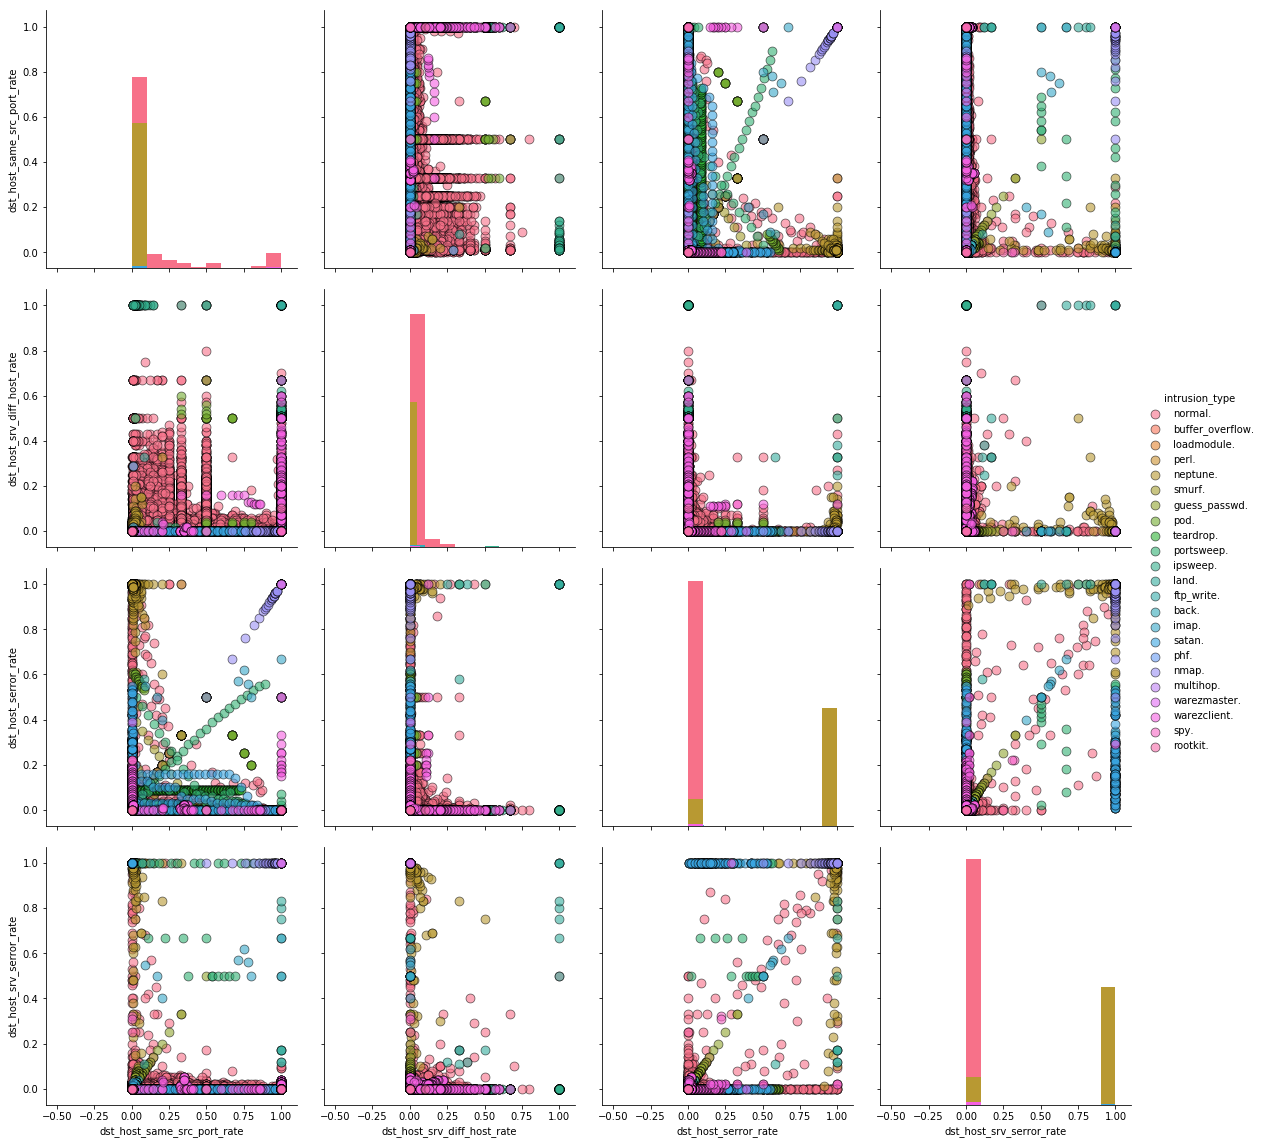

In [ ]:
pairplot(data, 'intrusion_type', features=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'])



<h5> Observations:- </h5>

- None of the pair plots are able to show linear separability/ almost linear separability between the different categories.


<h3> TSNE for Bivariate Analysis:- </h3>

<h6> Without categorical features:- </h6>

In [ ]:
from datetime import datetime

df = data.drop(['intrusion_type','protocol_type','service','flag'], axis=1)
Y = data['intrusion_type'].values

In [ ]:
from sklearn.manifold import TSNE
import joblib

In [ ]:
def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
    '''
    This function applies TSNE on the original dataset with no_components, perplexity_value, n_iter_value as the TSNE
    parameters and transforms the original dataset into TSNE transformed feature space with the tsne dataset containing
    number of features equal to the value specified for no_components and also plots the scatter plot of the transformed
    data points along with their class label
    '''
    start = datetime.now()
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
    sns.FacetGrid(tsne_data1, hue='Output', size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
    print('Total time taken:',datetime.now()-start)
    plt.show()

TSNE_1:-

In [ ]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=100, n_iter_value=500)

TSNE with perplexity=100 and no. of iterations=500


KeyboardInterrupt: ignored

TSNE_2:-

TSNE with perplexity=50 and no. of iterations=1000
(145586, 2)
Total time taken: 0:43:27.225309


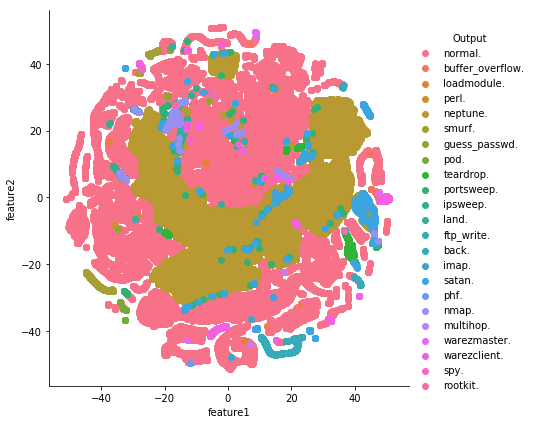

In [ ]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=50, n_iter_value=1000)


<h5> Observations:- </h5>
    
- From the above 2 graphs, it can be concluded that the data is not linearly separable/almost linearly separable  in the TSNE_transformed feature space.


## Train Test Split:- 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('intrusion_type', axis=1), data['intrusion_type'], stratify=data['intrusion_type'], test_size=0.25)

time: 203 ms (started: 2023-12-15 16:31:59 +05:30)


In [16]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(109189, 41)
(109189,)
Test data
(36397, 41)
(36397,)
time: 346 µs (started: 2023-12-15 16:32:01 +05:30)


## Vectorizing Categorical features using one-hot encoding:-

Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.

<h5> Protocol_type:- </h5>

In [17]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

Protocol types are: ['tcp', 'udp', 'icmp']
time: 4.75 ms (started: 2023-12-15 16:32:03 +05:30)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

time: 186 ms (started: 2023-12-15 16:32:04 +05:30)


In [19]:
print(train_protocol[1].toarray())
train_protocol.shape

[[0 0 1]]


(109189, 3)

time: 3.76 ms (started: 2023-12-15 16:32:05 +05:30)


<h5> Service:- </h5>

In [20]:
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

Service types are:
 ['domain_u', 'csnet_ns', 'exec', 'uucp_path', 'supdup', 'domain', 'time', 'iso_tsap', 'pop_3', 'discard', 'mtp', 'kshell', 'ssh', 'sunrpc', 'gopher', 'systat', 'imap4', 'other', 'login', 'name', 'urh_i', 'link', 'ldap', 'red_i', 'ctf', 'sql_net', 'daytime', 'courier', 'ntp_u', 'nntp', 'remote_job', 'whois', 'pm_dump', 'urp_i', 'IRC', 'auth', 'ecr_i', 'ftp_data', 'ftp', 'netstat', 'hostnames', 'pop_2', 'eco_i', 'smtp', 'printer', 'rje', 'efs', 'netbios_ns', 'telnet', 'shell', 'private', 'vmnet', 'uucp', 'http_443', 'bgp', 'klogin', 'echo', 'netbios_ssn', 'Z39_50', 'X11', 'finger', 'nnsp', 'http', 'tim_i', 'netbios_dgm']
time: 2.43 ms (started: 2023-12-15 16:32:06 +05:30)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

time: 197 ms (started: 2023-12-15 16:32:07 +05:30)


In [22]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
time: 671 µs (started: 2023-12-15 16:32:09 +05:30)


In [23]:
train_service.shape

(109189, 65)

time: 1.1 ms (started: 2023-12-15 16:32:10 +05:30)


<h5> Flag:- </h5>

In [24]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['RSTR', 'RSTO', 'S1', 'S3', 'S2', 'REJ', 'SF', 'SH', 'RSTOS0', 'OTH', 'S0']
time: 3.27 ms (started: 2023-12-15 16:32:11 +05:30)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

time: 309 ms (started: 2023-12-15 16:32:13 +05:30)


In [26]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 1 0 0 0 0 0 0 0 0 0]]


(109189, 11)

time: 1.61 ms (started: 2023-12-15 16:32:14 +05:30)


In [27]:
X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

time: 7.58 ms (started: 2023-12-15 16:32:15 +05:30)


<h3> Applying Standardisation on the continuous features of our dataset:- </h3>

In [28]:
def feature_scaling(X_train, X_test, feature_name):

    '''
    This function performs standardisation on the features
    '''

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))

    print(f"{feature_name} : {scaler1[1]}")
    return scaler1, scaler2

time: 405 µs (started: 2023-12-15 16:32:16 +05:30)


In [29]:
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')
num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')
num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')
srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')
dst_host_same_srv_rate1, dst_host_same_srv_rate2= feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')

land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])
is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])
is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])
logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])

count1, count2 = feature_scaling(X_train, X_test, 'count')
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')





duration : [-0.10677238]
src_bytes : [-0.00428503]
dst_bytes : [-0.04887908]
wrong_fragment : [-0.08430371]
urgent : [-0.00546978]
hot : [-0.07020158]
num_failed_logins : [-0.0180184]
num_compromised : [-0.00840022]
root_shell : [-0.01890255]
su_attempted : [-0.00955389]
num_root : [-0.0105179]
num_file_creations : [-0.02102596]
num_shells : [-0.0194584]
num_access_files : [-0.05054263]
srv_count : [9.89368759]
serror_rate : [-0.64311161]
srv_serror_rate : [-0.64257051]
rerror_rate : [-0.35057287]
srv_rerror_rate : [-0.35094152]
same_srv_rate : [0.77161647]
diff_srv_rate : [-0.33701372]
srv_diff_host_rate : [-0.38565856]
dst_host_diff_srv_rate : [-0.41739651]
dst_host_count : [0.74155596]
dst_host_srv_count : [1.08860608]
dst_host_same_srv_rate : [0.97828769]
dst_host_same_src_port_rate : [3.76589309]
dst_host_srv_diff_host_rate : [-0.31448696]
dst_host_serror_rate : [-0.6442014]
dst_host_srv_serror_rate : [-0.64150604]
dst_host_rerror_rate : [-0.36101288]
dst_host_srv_rerror_rate : [-

<h3> Merging categorical and continuous features:- </h3>

In [30]:
from scipy.sparse import hstack

time: 158 µs (started: 2023-12-15 16:32:20 +05:30)


In [31]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1, num_shells1,
       num_access_files1, is_host_login1.T,
       is_guest_login1.T, count1, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

time: 98.9 ms (started: 2023-12-15 16:32:21 +05:30)


In [32]:
X_train_1.shape

(109189, 116)

time: 1.3 ms (started: 2023-12-15 16:32:22 +05:30)


In [33]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_shells2,
       num_access_files2, is_host_login2.T,
       is_guest_login2.T, count2, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))

time: 25 ms (started: 2023-12-15 16:32:23 +05:30)


In [34]:
X_test_1.shape

(36397, 116)

time: 1.19 ms (started: 2023-12-15 16:32:24 +05:30)


In [35]:
import joblib
joblib.dump(X_train_1, DATA_DIR / 'X_train_1.pkl')
joblib.dump(X_test_1,DATA_DIR / 'X_test_1.pkl')
X_train_1 = joblib.load(DATA_DIR / 'X_train_1.pkl')
X_test_1 = joblib.load(DATA_DIR / 'X_test_1.pkl')

time: 113 ms (started: 2023-12-15 16:32:25 +05:30)


In [36]:
joblib.dump(Y_train,DATA_DIR / 'Y_train.pkl')
joblib.dump(Y_test,DATA_DIR / 'Y_test.pkl')
Y_train = joblib.load(DATA_DIR / 'Y_train.pkl')
Y_test = joblib.load(DATA_DIR / 'Y_test.pkl')

time: 14.7 ms (started: 2023-12-15 16:32:26 +05:30)


### Further Approach to our problem 

- **We will first apply below classifiers on our dataset and evaluate their performance:**
    
    
    1. Naive Bayes
    2. Logistic Regression
    3. SVM
    4. Decision Tree
    5. Random Forest
    6. GBDT / XGBoost
    
    
- **Based on the performance metric scores we obtain from the above classifiers, we will apply below feature engineering techniques on our dataset to get additional features:**
    
    
    1. Clustering features:- We will apply clustering on our dataset and add the clustering values as an additional feature to our dataset.
    
    2. PCA transformed features:- We will apply PCA/TSNE/SVD on the dataset and will use the top 5 PCA features as additional features on our dataset.  
    
    3. Feature engineering using existing features:- We will apply feature engineering techniques like
        (i) Adding 2 existing features, (e.g. new_feature_1 = src_bytes + dst_bytes)
        (ii)Subtracting 2 existing features, (e.g. new_feature_2 = abs(src_bytes - dst_bytes).
        
        
        
- **We will then apply the best performing classifiers from dataset 1 on dataset 2 and evaluate their performance.**

## Applying Machine Algorithms:- 

<h5> Utility Functions:- </h5>

In [37]:
from timeit import default_timer as timer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib


time: 301 µs (started: 2023-12-15 16:32:28 +05:30)


In [38]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit',
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']    
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

time: 433 µs (started: 2023-12-15 16:32:29 +05:30)


In [39]:
def model(model_name, X_train, Y_train, X_test, Y_test):

    '''
    This function computes the performance scores on the train and test data.
    '''

    print('Fitting the model and prediction on train data:')
    start = timer()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print(f'Time taken: {timer()-start:.2f} secs',)
    print('='*50)

    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')

    results_test = dict()
    print('Prediction on test data:')
    start = timer()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print(f'Time taken: {timer()-start:.2f} secs',)
    print(y_test_pred)
    print('='*50)

    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model

    return results_tr, results_test

time: 1.04 ms (started: 2023-12-15 16:32:30 +05:30)


In [40]:
def print_grid_search_attributes(model):

    '''
    This function prints all the grid search attributes
    '''

    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

time: 513 µs (started: 2023-12-15 16:32:31 +05:30)


In [42]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1

    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1

    tpr = tp/positives
    fpr = fp/negatives

    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr

    return results


time: 469 µs (started: 2023-12-15 16:32:33 +05:30)


<h3> Model_1 :- Gaussian Naive Bayes </h3>

In [43]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

time: 9.36 ms (started: 2023-12-15 16:32:34 +05:30)


Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Completed
Time taken: 20.83 secs
Prediction on test data:
Completed
Time taken: 0.31 secs
['neptune.' 'normal.' 'neptune.' ... 'normal.' 'neptune.' 'neptune.']
Performance metrics:
Confusion Matrix is:


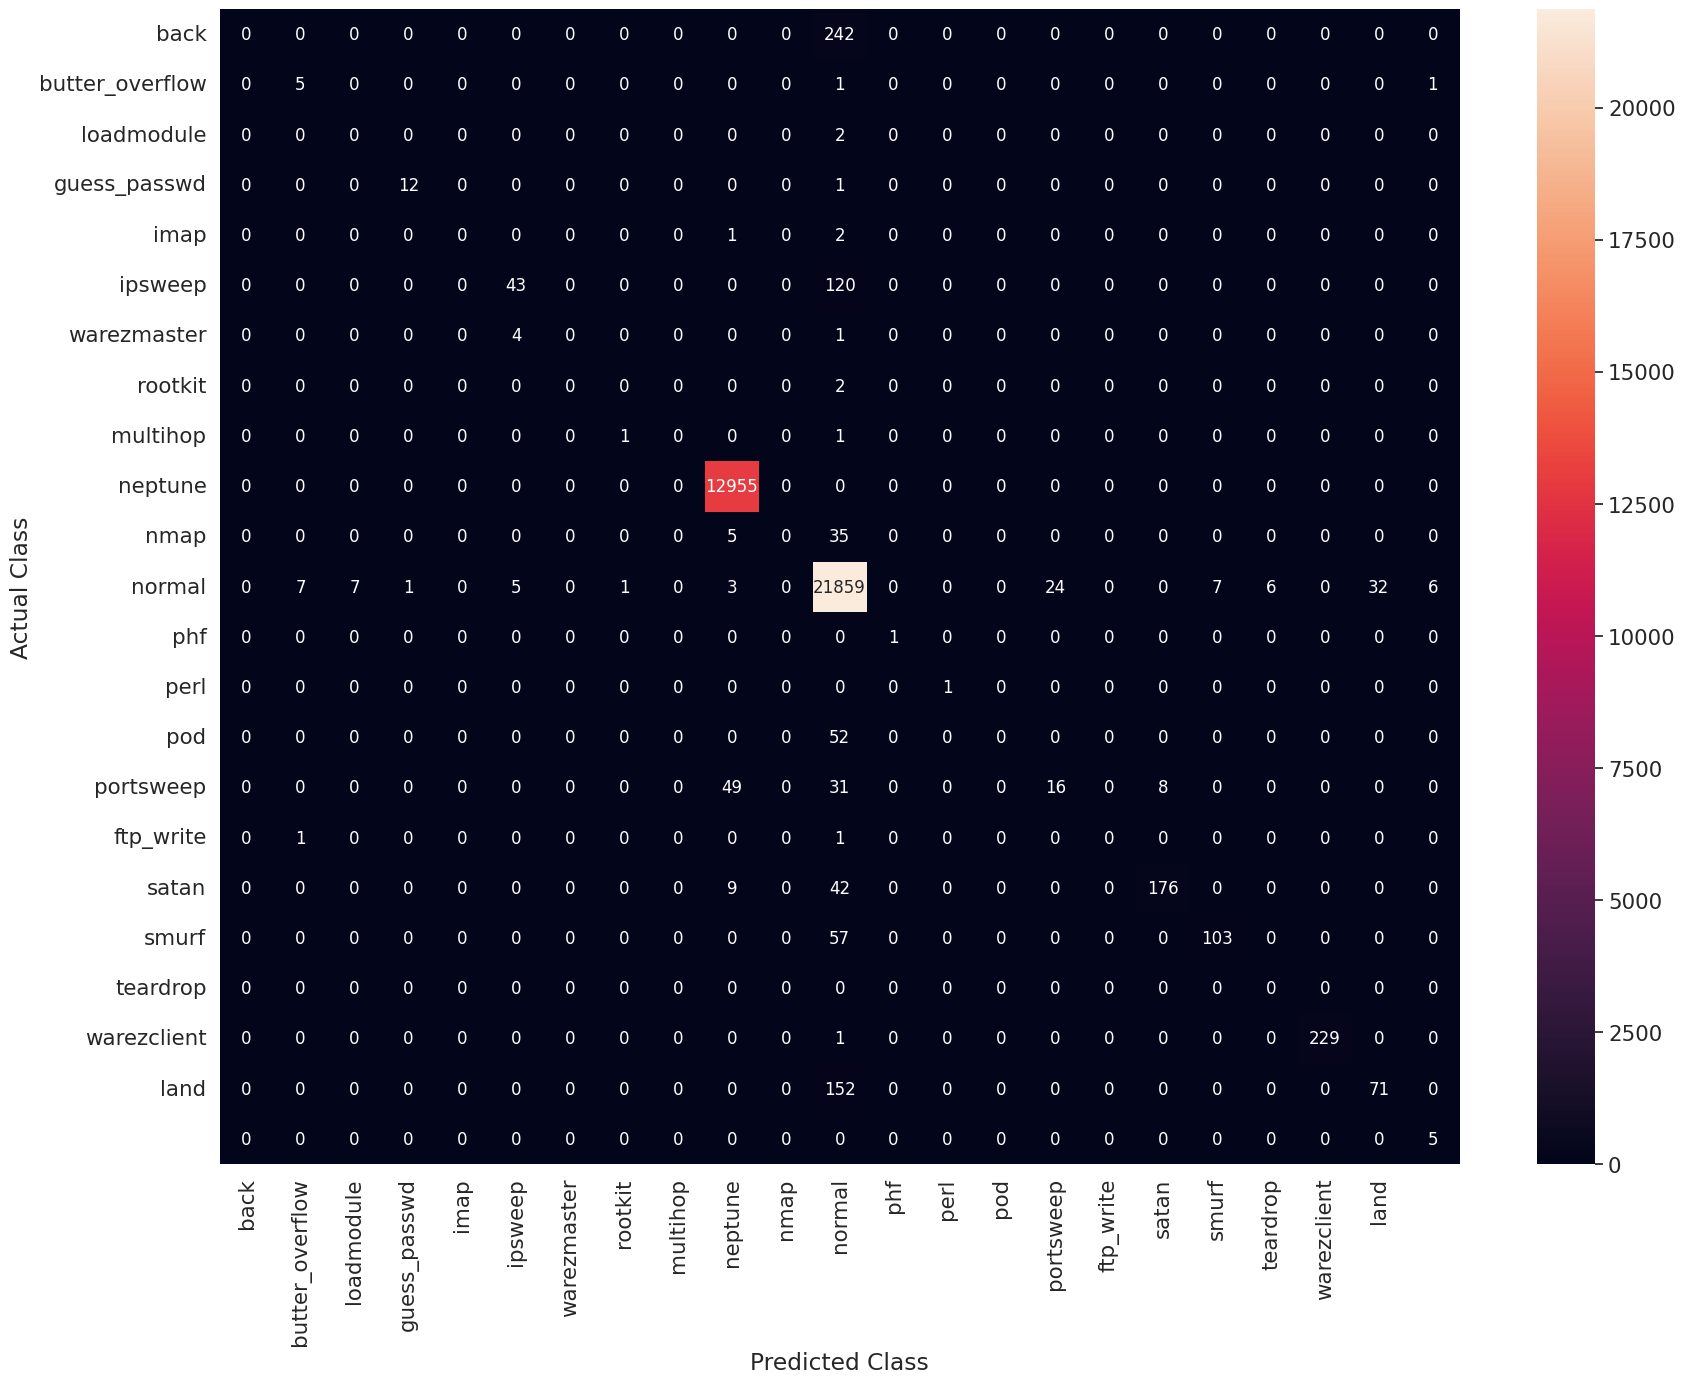

Precision score is:
0.9635504637466713
Recall score is:
0.9746957166799461
F1-score is:
0.9675672374287517
time: 24.5 s (started: 2023-12-15 16:32:37 +05:30)


In [44]:
nb_grid_results_tr, nb_grid_results_test = model(nb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [92]:
print_grid_search_attributes(nb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(var_smoothing=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 10}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9732940249511944

time: 1.94 ms (started: 2023-12-15 02:50:28 +05:30)


In [93]:
joblib.dump(nb_grid.best_estimator_, MODELS_DIR /'nb_gs.pkl')

['/home/gala/probe/uatu/models/nb_gs.pkl']

time: 1.95 ms (started: 2023-12-15 02:50:33 +05:30)


In [94]:
nb_gs = nb_grid.best_estimator_
y_tr_pred = nb_gs.predict(X_train_1.toarray())
y_test_pred = nb_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

time: 1.75 s (started: 2023-12-15 02:50:35 +05:30)


In [102]:
print( f"{tpr_fpr_train = }", f"{nb_grid_results_tr = }", f"{tpr_fpr_test = }", f"{nb_grid_results_test = }", sep="\n\n")

tpr_fpr_train = {'tp': 65542, 'tpr': 0.9949600752952606, 'fp': 2231, 'fpr': 0.05150640655662011}

nb_grid_results_tr = {'precision': 0.9635890578837473, 'recall': 0.9743472327798588, 'f1_score': 0.967416016248583}

tpr_fpr_test = {'tp': 21857, 'tpr': 0.9954003096821205, 'fp': 770, 'fpr': 0.053327792783433754}

nb_grid_results_test = {'precision': 0.9622739431676872, 'recall': 0.9736791493804434, 'f1_score': 0.9662003874207767, 'model': <function model at 0x7f6964172f20>}
time: 395 µs (started: 2023-12-15 02:53:04 +05:30)


#### Observations from applying Naive Bayes Classifier:-



    
- The test data has 36397 total no. of points. Out of these, 21958 are points belonging to Normal connections and remaining 14439 points belong to Bad connections.
    

- Out of the 21958 Normal connection points, 21814 (99.49%) were classified correctly by the Naive Bayes Classifier.
  
  
- Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) are classified correctly.
    
    
- Out of the classes having very less no. of data points, class guess_passwd was classified with (12/13) 92.30% accuracy, class butter_overflow with (6/7) 85.71% accuracy,class warezmaster with(4/5) 80% accuracy, class land with(4/5) 80% accuracy, class imap with(0/3) 0% accuracy, class loadmodule with (1/2) 50% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and classes phf and perl with both (1/1) 100% accuracy.
    
    
- Although the Naive bayes Classifier was able to classify points with a high f1 score of 0.9670, we can use more advanced Non-linear and linear classifiers ahead and we will try to classify the Normal and bad connections with a higher f1-score.


- false positives : 770


- false positive rate : 0.059


- true positive : 21814


- true positive rate : 0.9934


- As the train and test scores are almost similar and high, we can say that the model is "NEITHER OVERFITTING NOR UNDERFITTING".

### Model_2:- Logistic Regression

In [45]:
hyperparameter = {'alpha':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l1', 'l2']}
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log_loss')
lr_grid = GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

time: 54.5 ms (started: 2023-12-15 16:33:23 +05:30)


Fitting the model and prediction on train data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Completed
Time taken: 136.00 secs
Prediction on test data:
Completed
Time taken: 0.01 secs
['neptune.' 'normal.' 'neptune.' ... 'normal.' 'neptune.' 'neptune.']
Performance metrics:
Confusion Matrix is:


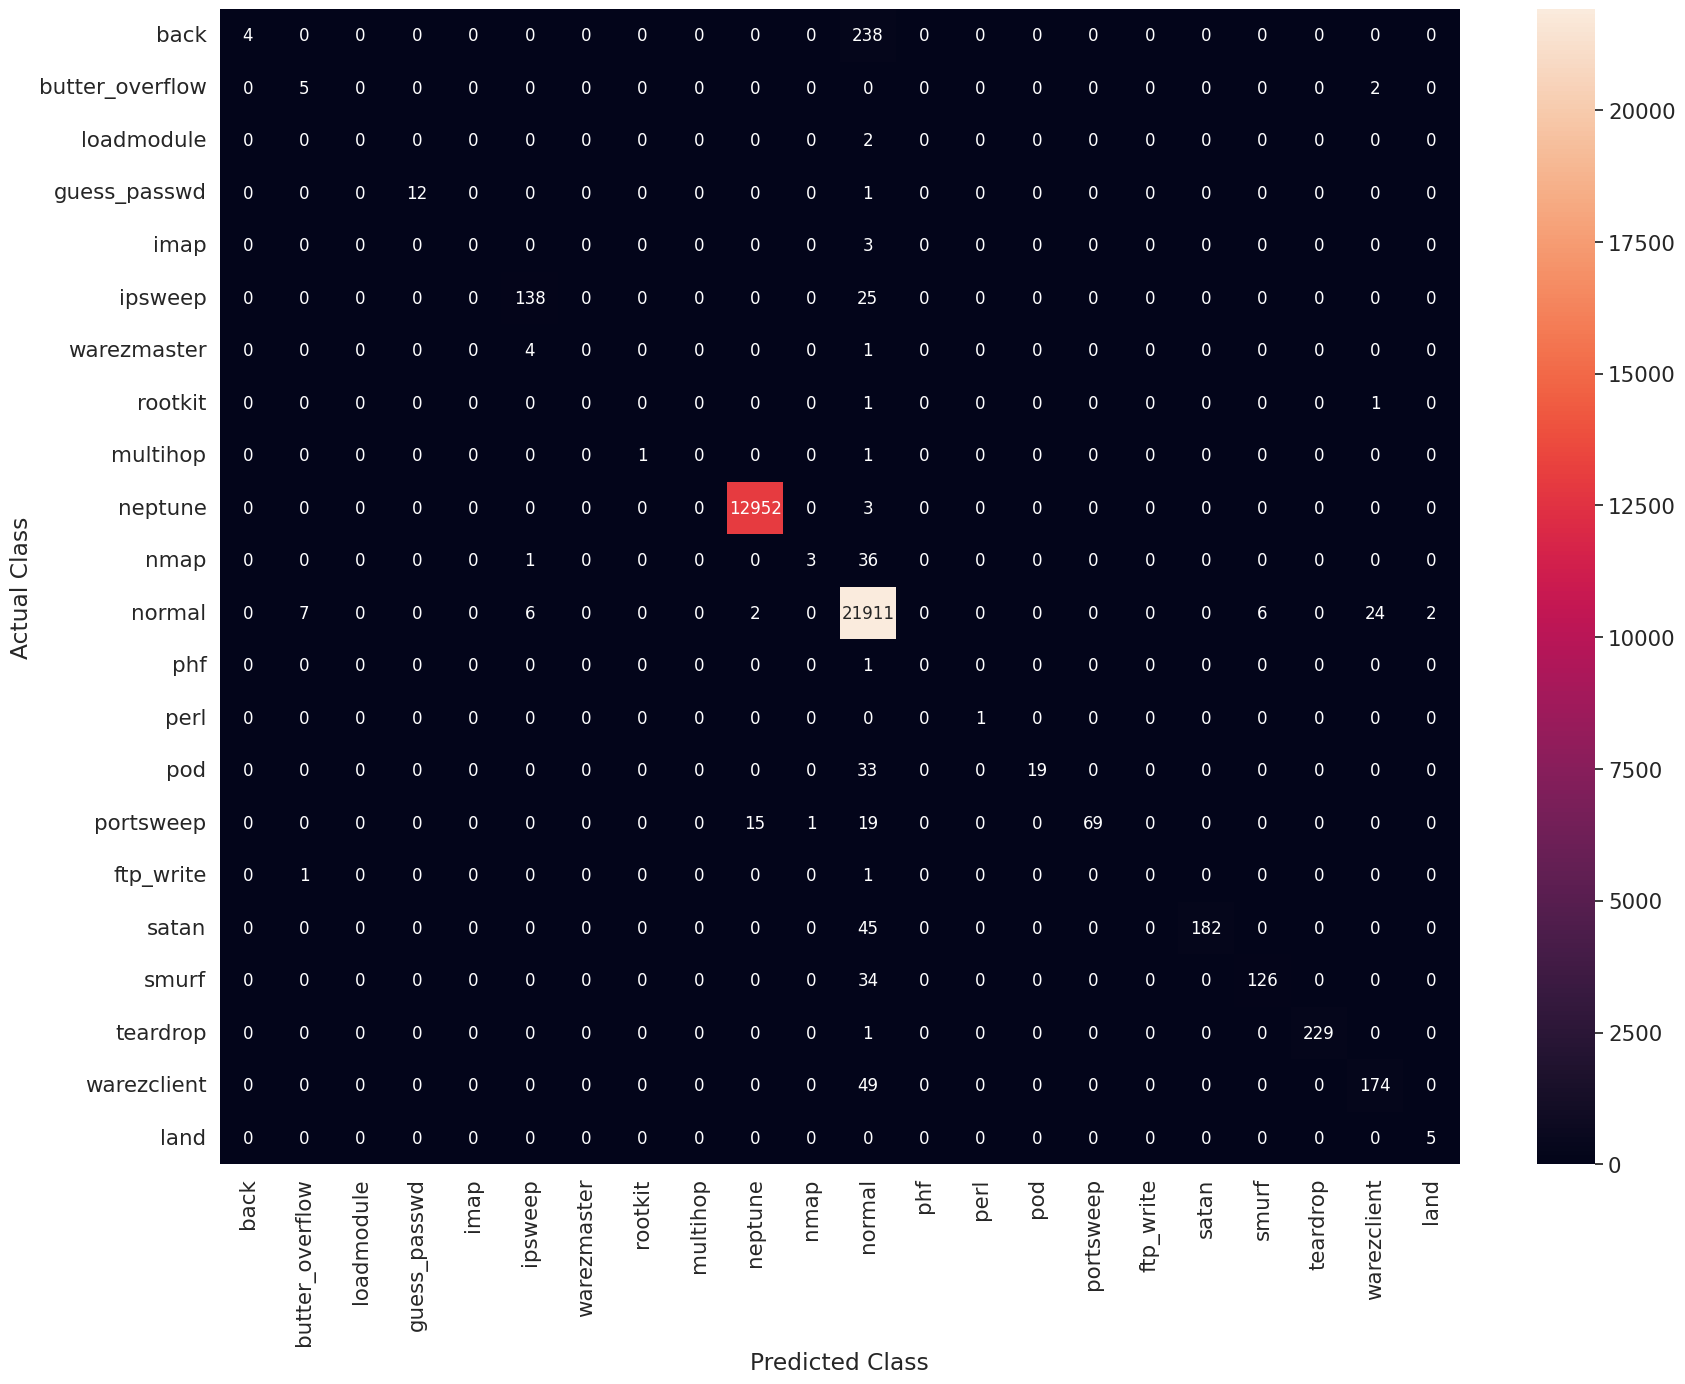

Precision score is:
0.9839787984175083
Recall score is:
0.9844217930049179
F1-score is:
0.9802269078478901
time: 2min 18s (started: 2023-12-15 16:33:26 +05:30)


In [46]:
lr_grid_results_tr, lr_grid_results_test = model(lr_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [109]:
print_grid_search_attributes(lr_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=0.001, loss='log_loss', penalty='l1')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 0.001, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9842291895648954

time: 469 µs (started: 2023-12-15 03:01:01 +05:30)


In [110]:
joblib.dump(lr_grid.best_estimator_, MODELS_DIR / 'lr_gs.pkl')

['/home/gala/probe/uatu/models/lr_gs.pkl']

time: 1.97 ms (started: 2023-12-15 03:01:06 +05:30)


In [111]:
lr_gs = lr_grid.best_estimator_
y_tr_pred = lr_gs.predict(X_train_1.toarray())
y_test_pred = lr_gs.predict(X_test_1.toarray())
tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

time: 204 ms (started: 2023-12-15 03:01:10 +05:30)


In [112]:
lr_grid_results_tr

{'precision': 0.9739844669421768,
 'recall': 0.976856643068441,
 'f1_score': 0.9752834799188534}

time: 1.03 ms (started: 2023-12-15 03:01:16 +05:30)


In [113]:
tpr_fpr_train

{'tp': 64970,
 'tpr': 0.9862768315268543,
 'fp': 1269,
 'fpr': 0.029297010273577284}

time: 1.09 ms (started: 2023-12-15 03:01:18 +05:30)


In [114]:
lr_grid_results_test

{'precision': 0.9740979180586161,
 'recall': 0.9778278429540896,
 'f1_score': 0.9758028003161945,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

time: 1.18 ms (started: 2023-12-15 03:01:21 +05:30)


In [115]:
tpr_fpr_test

{'tp': 21691, 'tpr': 0.9878404226250114, 'fp': 429, 'fpr': 0.02971119883648452}

time: 1.68 ms (started: 2023-12-15 03:01:22 +05:30)


<h6> Observations from applying Logistic Regression Classifier:- </h6>


- Out of the 21958 Normal connection points, 21918 (99.81%) were correctly classified by the LR Classifier.
    

- Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12950(99.96%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (2/7) 28.15% accuracy, class warezmaster with(0/5) 0% accuracy, class land with(4/5) 80% accuracy, class imap with(0/3) 0% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and class phf with (0/1)
0% accuracy and class perl with (0/1) 0% accuracy.
        

- Classes with very low no. of data points like loadmodule, multihop, ftp_write, phf were not classified correctly by this classifier.
    

- The Logistic Regression Classifier was able to classify points with a high f1 score of 0.9819 compared to the Naive Bayes Classifier.
        

- From the good performance of the Logistic Regression model, we can conclude that the data has some linearity in the higher dimensional space which was not visible in the lower dimensional 2D pair plots and Tsne transformed 2D space.


- True Postives = 21918


- TPR = 0.9981


- False Positives = 399


- FPR = 0.0276


- LR model has a lower FPR and higher TPR than the NB Classifier.


- As the train and test scores are almost similar and high, we can say that the LR model is "NEITHER OVERFITTING NOR UNDERFITTING".

<h3> Model_3 :- SVM (SGD_Classifier with loss='hinge') </h3>

In [ ]:
hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')
svm_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 22 candidates, totalling 110 fits
Completed
Time taken: 0:25:04.850411
Prediction on test data:
Completed
Time taken: 0:00:00.020029
Performance metrics:
Confusion Matrix is:


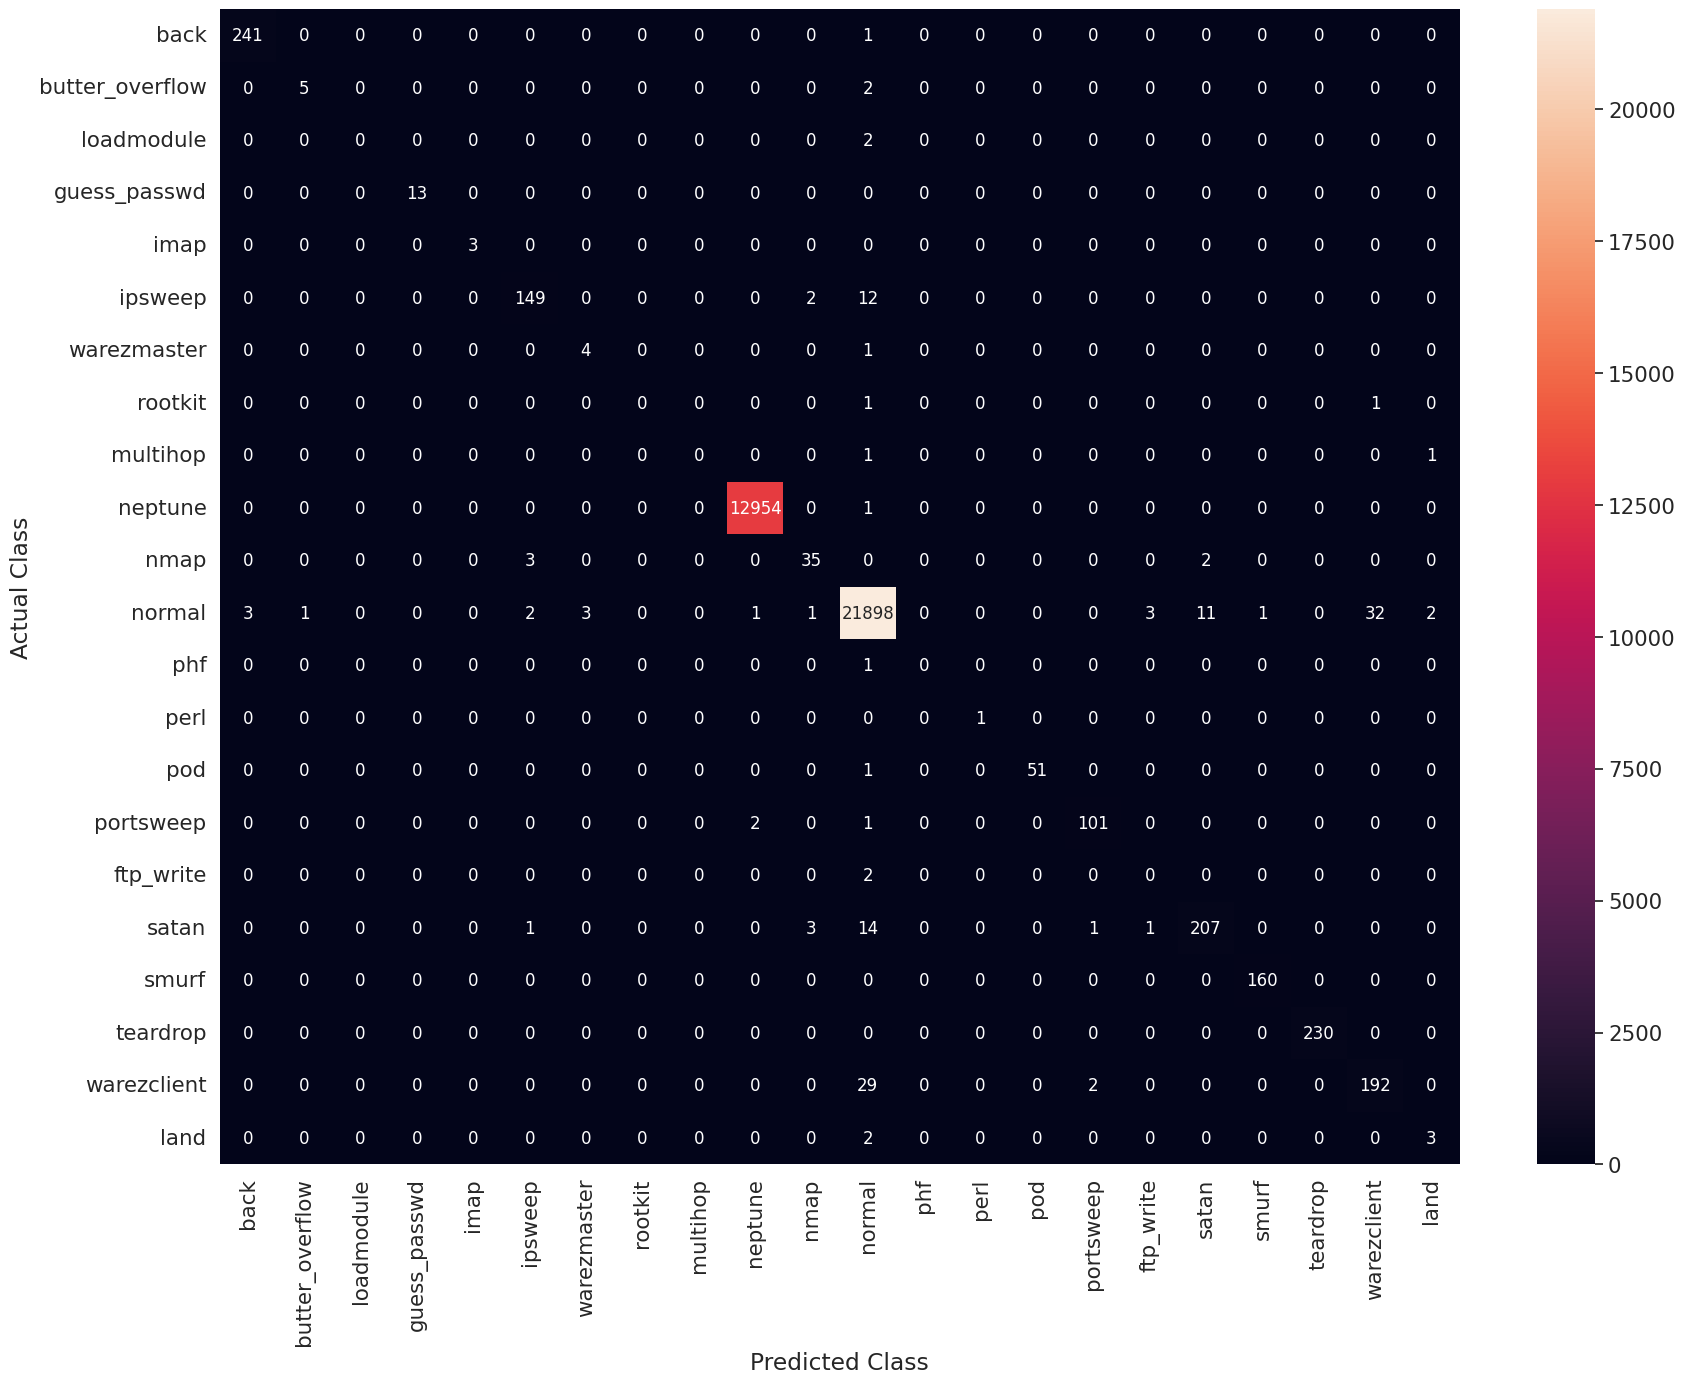

Precision score is:
0.995768158136983
Recall score is:
0.9958787812182323
F1-score is:
0.9958146965005737


In [ ]:
svm_grid_results_tr, svm_grid_results_test = model(svm_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(svm_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=1e-06, penalty='l1')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 1e-06, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.996428209954258



In [ ]:
joblib.dump(svm_grid.best_estimator_, MODELS_DIR / 'svm_gs.pkl')

['svm_gs.pkl']

In [ ]:
svm_gs = svm_grid.best_estimator_
y_tr_pred = svm_gs.predict(X_train_1.toarray())
y_test_pred = svm_gs.predict(X_test_1.toarray())
svm_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
svm_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
svm_grid_results_tr

{'precision': 0.9967849536254734,
 'recall': 0.9968128657648664,
 'f1_score': 0.9967821350970356}

In [ ]:
svm_tpr_fpr_train

{'tp': 65747,
 'tpr': 0.9980720769954762,
 'fp': 185,
 'fpr': 0.004271037746739005}

In [ ]:
svm_grid_results_test

{'precision': 0.995768158136983,
 'recall': 0.9958787812182323,
 'f1_score': 0.9958146965005737,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
svm_tpr_fpr_test

{'tp': 21898, 'tpr': 0.9972675107022497, 'fp': 71, 'fpr': 0.004917238035875061}

<h6> Observations from applying SVM Classifier (SGD Classifier + "hinge" loss):- </h6>


    
    
- Out of the 21958 Normal connection points, 21931 (99.85%) were correctly classified by the SVM Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100.0% accuracy, class buffer_overflow with (1/7) 14.71% accuracy,class warezmaster with(3/5) 60% accuracy, class land with(4/5) 80% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and class phf with (1/1)100% accuracy and class perl with (0/1) 0% accuracy.


- The SVM Classifier was able to classify points with a high f1 score of 0.9966 compared to Naive Bayes and LR Classifiers.
        


- True Postives = 21931


- TPR = 0.9985


- False Positives = 63


- FPR = 0.0043


- The SVM Classifier has the lowest FPR and highest FPR than the NB and LR models.


- As the train and test scores are almost similar and high, we can say that the LR model is "NEITHER OVERFITTING NOR UNDERFITTING"

<h3> Model_4 :- Decision Tree </h3>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Completed
Time taken: 0:01:26.635046
Prediction on test data:
Completed
Time taken: 0:00:00.007564
Performance metrics:
Confusion Matrix is:


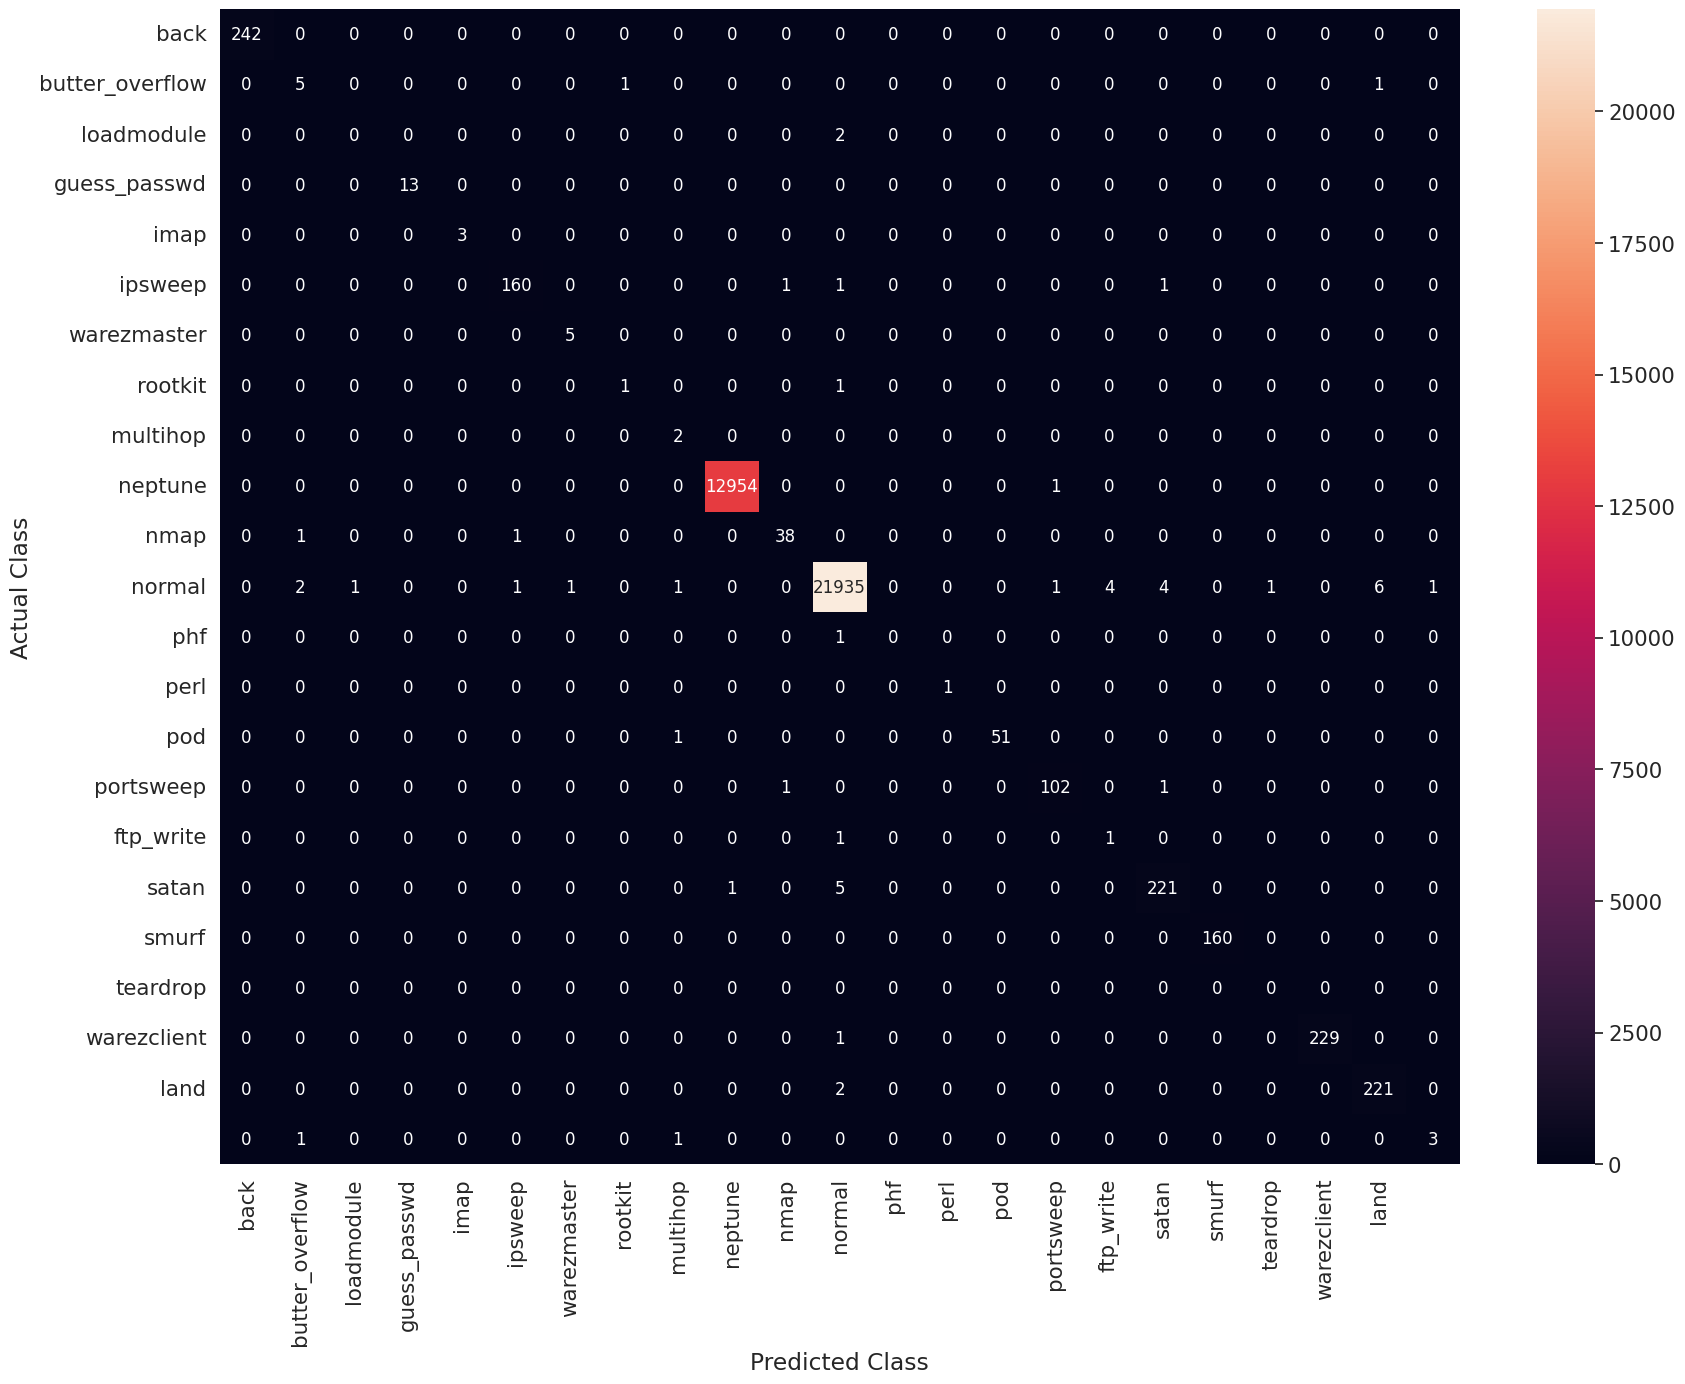

Precision score is:
0.99874003291667
Recall score is:
0.9986262604060774
F1-score is:
0.9986674872824969


In [ ]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                       min_samples_split=5)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 50, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9981133659191793



In [ ]:
joblib.dump(decision_tree_grid.best_estimator_,MODELS_DIR / 'decision_tree_gs.pkl')

['decision_tree_gs.pkl']

In [ ]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_1.toarray())
y_test_pred = dt_gs.predict(X_test_1.toarray())
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
decision_tree_grid_results_tr

{'precision': 0.9998315380054192,
 'recall': 0.999825989797507,
 'f1_score': 0.999827440000768}

In [ ]:
dt_tpr_fpr_train

{'tp': 65856, 'tpr': 0.999726751070225, 'fp': 0, 'fpr': 0.0}

In [ ]:
decision_tree_grid_results_test

{'precision': 0.99874003291667,
 'recall': 0.9986262604060774,
 'f1_score': 0.9986674872824969,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
dt_tpr_fpr_test

{'tp': 21935,
 'tpr': 0.9989525457691958,
 'fp': 14,
 'fpr': 0.0009695962324260683}

<h6> Observations from applying Decision Tree Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21934 (99.89%) were correctly classified by the Decision Tree Classifier.
    

- Out of the 14439 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12953(99.98%) were classified correctly.


- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (6/7) 85.71% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(4/5) 80% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(1/2) 50% accuracy, class multihop with (1/2) 50% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.
    
    
- The Decision Tree Classifier was able to classify points with a higher f1 score of 0.9986 compared to all the previous Classifiers.


- True Postives = 21937


- TPR = 0.9990


- False Positives = 19


- FPR = 0.0013


- The DT Classifier has the lowest FPR and highest TPR compared to all of the above models.


- Thus, we can say that a non linear ML model like DT is able to learn the pattern from the data better compared to the linear classifiers.
        

<h3> Model_5 :- Random Forest </h3>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Completed
Time taken: 0:39:44.707780
Prediction on test data:
Completed
Time taken: 0:00:00.274277
Performance metrics:
Confusion Matrix is:


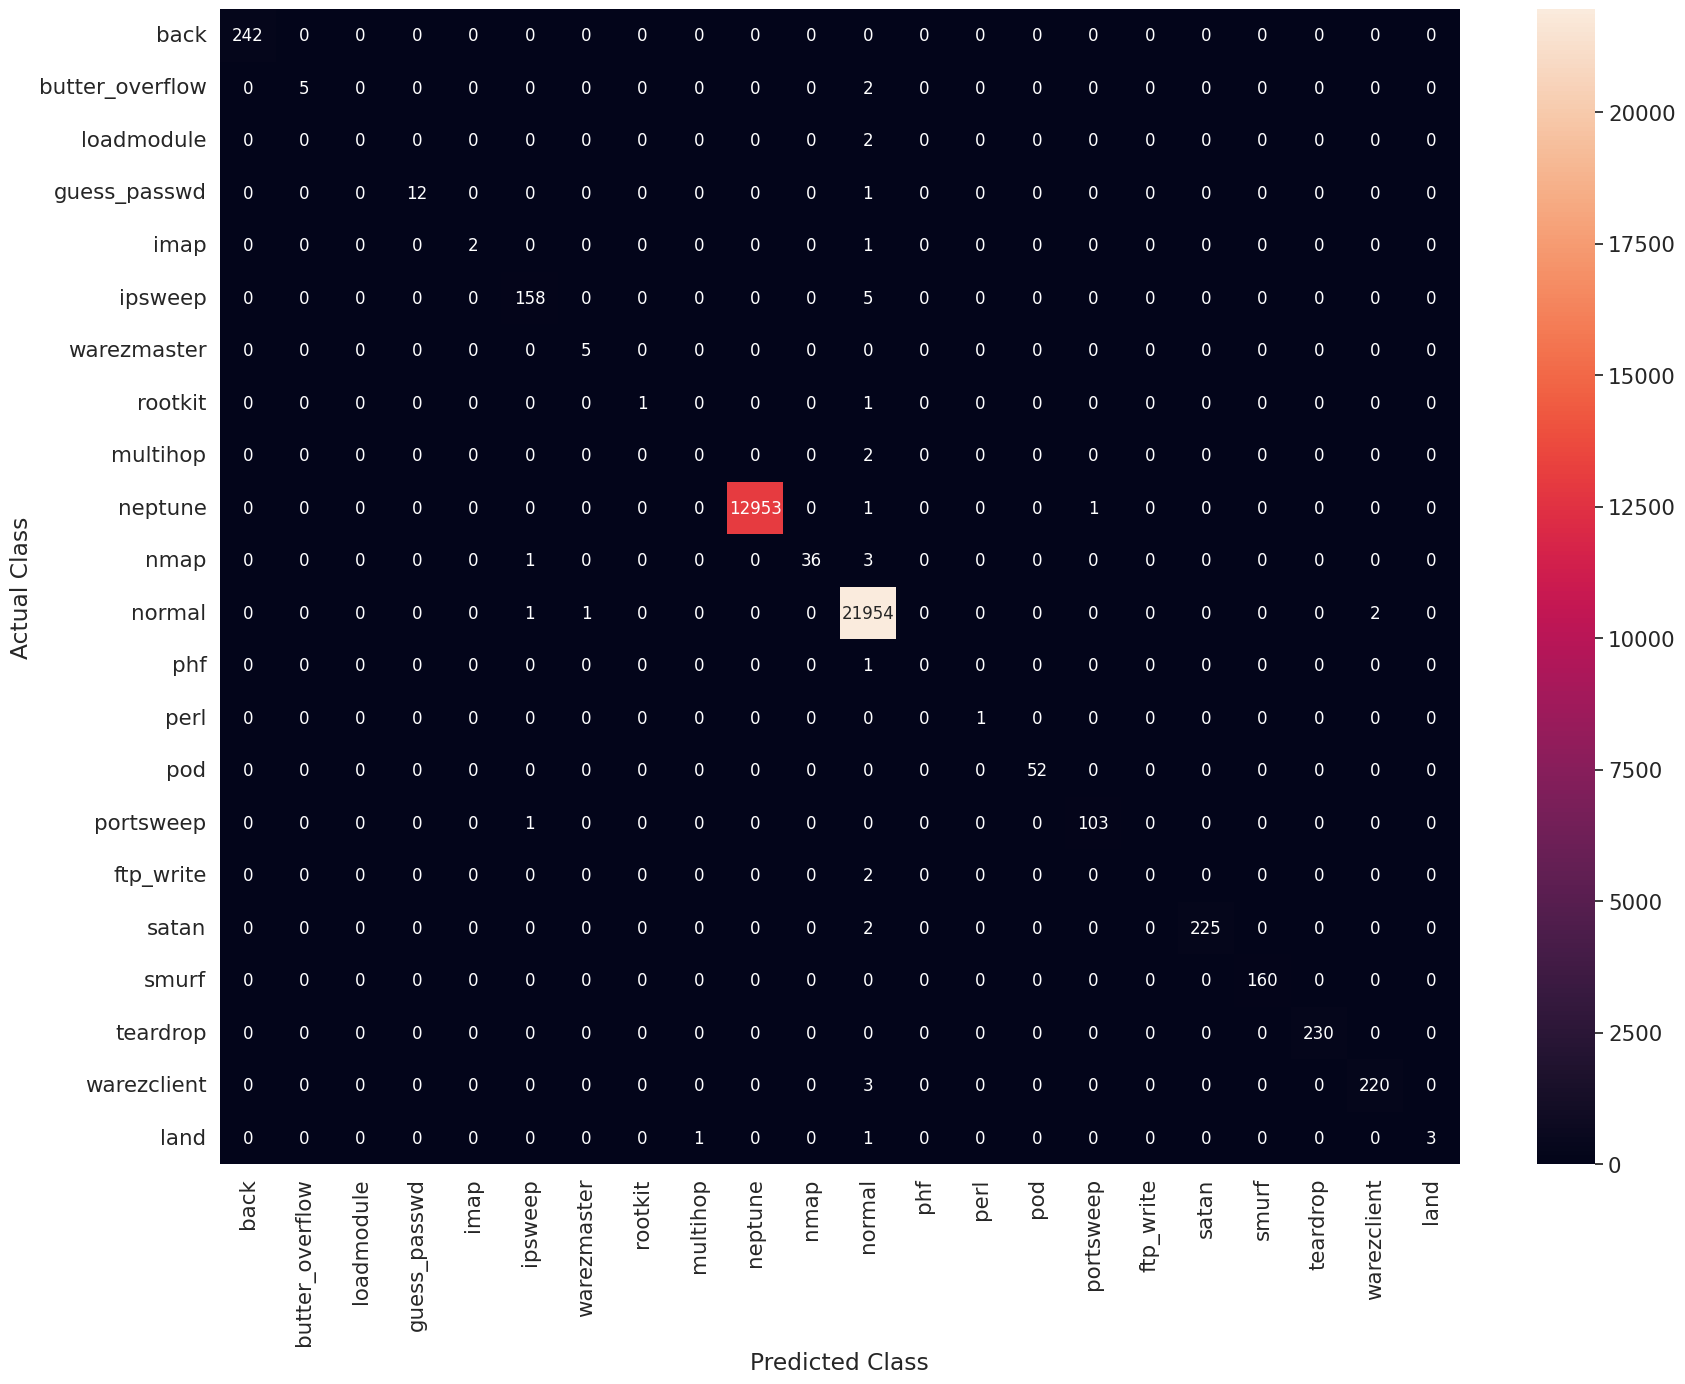

Precision score is:
0.9988776174478341
Recall score is:
0.9990383822842542
F1-score is:
0.9989342572262744


In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(class_weight='balanced', max_depth=1000,
                       min_samples_split=5, n_estimators=50)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 1000, 'min_samples_split': 5, 'n_estimators': 50}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9991299495745221



In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_1.toarray())
y_test_pred = rf_gs.predict(X_test_1.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
rf_grid_results_tr

{'precision': 0.9999466963207816,
 'recall': 0.999945049409739,
 'f1_score': 0.999945475266431}

In [ ]:
rf_tpr_fpr_train

{'tp': 65868, 'tpr': 0.9999089170234083, 'fp': 0, 'fpr': 0.0}

In [ ]:
rf_grid_results_test

{'precision': 0.9988776174478341,
 'recall': 0.9990383822842542,
 'f1_score': 0.9989342572262744,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
rf_tpr_fpr_test

{'tp': 21954,
 'tpr': 0.9998178340468167,
 'fp': 27,
 'fpr': 0.0018699355911074174}

In [ ]:
joblib.dump(rf_grid.best_estimator_, MODELS_DIR / 'rf_gs.pkl')

['rf_gs.pkl']

<h6> Observations from applying Random Forest Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21954 (99.98%) were correctly classified by the RF Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (6/7) 85.71% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(4/5) 80% accuracy, class imap with(2/3) 66.67% accuracy, class loadmodule with (1/2) 50% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (1/2) 50% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.
    

- The RF Classifier was able to classify the Normal connection points with the highest f1_score compared to all of the above classifiers.
        

- But this classifier was still unable to correctly classify bad connection classes like loadmodule, rootkit and ftp_write.


- True Postives = 21954


- TPR = 0.9998


- False Positives = 19


- FPR = 0.0013


- The RF Classifier has a lower FPR compared to the DT model.


- As the train and test metrics like f1-score, tpr and fpr are almost similar, the model is NOT OVERFITTING.

        

<h3> Model_6 :- XGBoost </h3>

In [47]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob')
xgb_grid = RandomizedSearchCV(xgb, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

time: 18.4 ms (started: 2023-12-15 16:36:01 +05:30)


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Y_train)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
time: 1min 20s (started: 2023-12-15 16:36:02 +05:30)


Fitting the model and prediction on train data:
Completed
Time taken: 6.23 secs
Prediction on test data:
Completed
Time taken: 0.06 secs
[ 9 11  9 ... 11  9  9]
Performance metrics:
Confusion Matrix is:


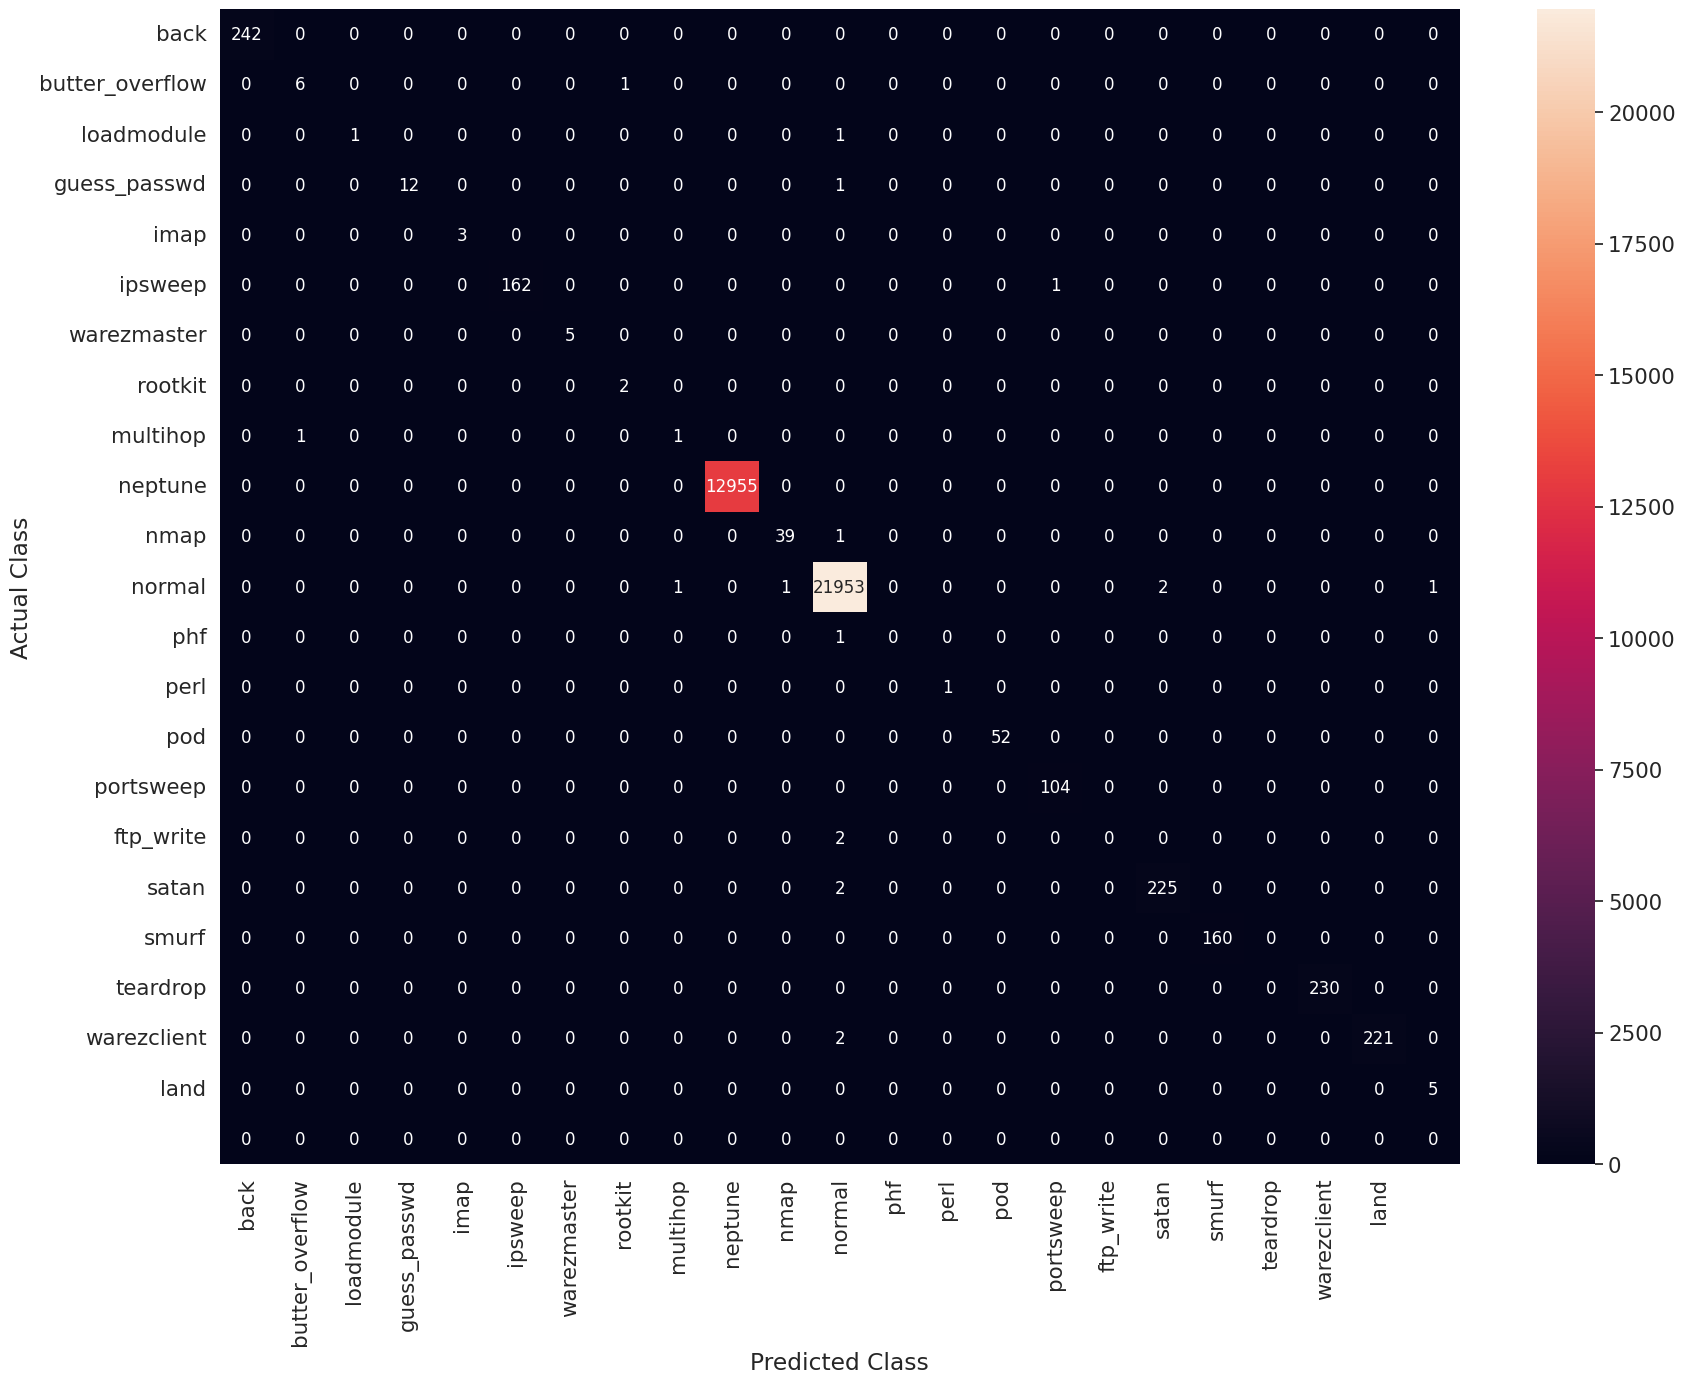

Precision score is:
0.9868765319586473
Recall score is:
0.9869769486496139
F1-score is:
0.9869196648356178
time: 7.14 s (started: 2023-12-15 16:37:23 +05:30)


In [49]:
y_test = le.fit_transform(Y_test)
xgb_grid_results_tr, xgb_grid_results_test = model(xgb_best, X_train_1.toarray(), y_train, X_test_1.toarray(), y_test)

In [50]:
print_grid_search_attributes(xgb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'n_estimators': 100, 'max_dept

In [51]:
xgb_gs = xgb_grid.best_estimator_
y_tr_pred = xgb_gs.predict(X_train_1.toarray())
y_test_pred = xgb_gs.predict(X_test_1.toarray())
xgb_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
xgb_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

time: 424 ms (started: 2023-12-15 16:39:10 +05:30)


In [52]:
xgb_grid_results_tr

{'precision': 0.9999909006549461,
 'recall': 0.9999908415682899,
 'f1_score': 0.9999908563530009}

time: 951 µs (started: 2023-12-15 16:39:13 +05:30)


In [53]:
xgb_tpr_fpr_train

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

time: 1.58 ms (started: 2023-12-15 16:39:14 +05:30)


In [54]:
xgb_grid_results_test

{'precision': 0.9868765319586473,
 'recall': 0.9869769486496139,
 'f1_score': 0.9869196648356178,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

time: 1.1 ms (started: 2023-12-15 16:39:15 +05:30)


In [55]:
xgb_tpr_fpr_test

{'tp': 0, 'tpr': 0.0, 'fp': 0, 'fpr': 0.0}

time: 1.1 ms (started: 2023-12-15 16:39:16 +05:30)


In [56]:
joblib.dump(xgb_grid.best_estimator_, MODELS_DIR / 'xgb_gs.pkl')

['/home/gala/probe/uatu/models/xgb_gs.pkl']

time: 9.57 ms (started: 2023-12-15 16:39:17 +05:30)


<h6> Observations from applying XG Boost Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21955 (99.98%) were correctly classified by the XGB Classifier.


- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12955(100.0%) were classified correctly.


- Out of the classes having very less no. of data points, class guess_passwd was classified with (12/13) 92.30% accuracy, class butter_overflow with (7/7) 100.0% accuracy, class warezmaster with(4/5) 80% accuracy, class land with(5/5) 100% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(1/2) 50% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.

    
- The XGB Classifier was able to classify different classes with the highest f1-score(0.9994) comapred to all of the above models.


- True Postives = 21955


- TPR = 0.9998


- False Positives = 12


- FPR = 0.00083


- The XGB Classifier has the highest TPR and lowest FPR compared to all of the previous models.


- As the train and test metrics like f1-score, tpr and fpr are almost similar, the model is NOT OVERFITTING.



<h2> Observation from ALL of the above classifiers:- </h2>

- If we consider NORMAL connection points as 1 class and points belonging to all the other 22 BAD connection classes as the 2nd class, then XGB Classifier is the best classifier as it has a TPR and FPR of 0.9998 and 0.0011.


- Although XGB classifier had a better f1_score than the RF classifier, if we go into details of the confusion matrix scores, we can observe that both classifiers have performed similarly on the different categories of attacks on our  dataset.


- The RF Classifier has TPR and FPR of 0.9998 and 0.0013.
    

- The overall time taken for training + evaluation was less for the RF and DT classifiers compared to the XGB classifier.


<h6> As the train and test metrics like f1-score, tpr and fpr have almost similar scores for train and test dataseta, the models are NOT OVERFITTING. </h6>
    

- A common pattern shown by all of the classifiers is that classes rootkit, ftp_write and loadmodule were misclassified as class Normal by most of the classifiers.
        

- We will add more features in our dataset and try to improve the classifier performance.
    

- As DT, RF & XGB had the best performance, we will use these 3 classifiers ahead on the existing + feature engineered data.

<h2> Adding new features:- </h2>

<h3> 1. Clustering features (using MiniBatchKmeans):- </h3>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

<h6> KMeans with n=23 (for Multiclass Classification):- </h6>

In [57]:
data = pd.read_pickle(DATA_DIR / 'data.pkl')
print('Shape of our dataset', data.shape)

Shape of our dataset (145586, 42)
time: 18.9 ms (started: 2023-12-15 16:39:29 +05:30)


In [58]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

time: 49.4 ms (started: 2023-12-15 16:39:33 +05:30)


In [59]:
kmeans_1 = MiniBatchKMeans(n_clusters=23, random_state=0, batch_size=128, max_iter=1000) #Multiclass classification
kmeans_1.fit(X_train_1)

MiniBatchKMeans(batch_size=128, max_iter=1000, n_clusters=23, random_state=0)

time: 176 ms (started: 2023-12-15 16:39:34 +05:30)


In [60]:
train_cluster_1 = kmeans_1.predict(X_train_1)
test_cluster_1 = kmeans_1.predict(X_test_1)

time: 64.2 ms (started: 2023-12-15 16:39:36 +05:30)


In [61]:
print('Length of train cluster is:',len(train_cluster_1))
train_cluster_1

Length of train cluster is: 109189


array([20,  0, 20, ..., 10, 17, 16], dtype=int32)

time: 1.38 ms (started: 2023-12-15 16:39:37 +05:30)


In [62]:
print('Length of test cluster is',len(test_cluster_1))
test_cluster_1

Length of test cluster is 36397


array([17, 20,  1, ...,  7,  8,  2], dtype=int32)

time: 1.52 ms (started: 2023-12-15 16:39:39 +05:30)


In [63]:
train_cluster_1 = np.array([train_cluster_1])
train_cluster_1.shape

(1, 109189)

time: 1.07 ms (started: 2023-12-15 16:39:40 +05:30)


In [64]:
test_cluster_1 = np.array([test_cluster_1])
test_cluster_1.shape

(1, 36397)

time: 1.35 ms (started: 2023-12-15 16:39:41 +05:30)


<h6> KMeans with n=2 (for solving Binary Classification problem to improve TPR and reduce FPR):- </h6>

In [65]:
kmeans_2 = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=128, max_iter=1000) #Binary Classification
kmeans_2.fit(X_train_1)

MiniBatchKMeans(batch_size=128, max_iter=1000, n_clusters=2, random_state=0)

time: 70.1 ms (started: 2023-12-15 16:39:43 +05:30)


In [66]:
train_cluster_2 = kmeans_2.predict(X_train_1)
test_cluster_2 = kmeans_2.predict(X_test_1)

time: 56 ms (started: 2023-12-15 16:39:44 +05:30)


In [67]:
print('Length of train cluster is:',len(train_cluster_2))
train_cluster_2

Length of train cluster is: 109189


array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

time: 1.46 ms (started: 2023-12-15 16:39:45 +05:30)


In [68]:
print('Length of test cluster is',len(test_cluster_2))
test_cluster_2

Length of test cluster is 36397


array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

time: 1.67 ms (started: 2023-12-15 16:39:46 +05:30)


In [69]:
train_cluster_2 = np.array([train_cluster_2])
train_cluster_2.shape

(1, 109189)

time: 1.54 ms (started: 2023-12-15 16:39:48 +05:30)


In [70]:
test_cluster_2 = np.array([test_cluster_2])
test_cluster_2.shape

(1, 36397)

time: 1.16 ms (started: 2023-12-15 16:39:49 +05:30)


<h3> 2. PCA features :- </h3>

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- We will add top 5 PCA features to our dataset. (We can add more or less and test if they improve the performance)

In [71]:
from sklearn.decomposition import PCA

time: 152 µs (started: 2023-12-15 16:39:54 +05:30)


In [72]:
pca = PCA(n_components=5)
pca.fit(X_train_1.toarray())
pca_train = pca.transform(X_train_1.toarray())
pca_test = pca.transform(X_test_1.toarray())

time: 606 ms (started: 2023-12-15 16:39:55 +05:30)


In [73]:
print(pca_train.shape)
print(pca_test.shape)

(109189, 5)
(36397, 5)
time: 224 µs (started: 2023-12-15 16:39:56 +05:30)


<h3> 3. Additional feature engineering :-</h3>

<h6> src_bytes + dst_bytes </h6>

In [74]:
feature_src_dst_1 = src_bytes1 + dst_bytes1
feature_src_dst_2 = src_bytes2 + dst_bytes2

time: 600 µs (started: 2023-12-15 16:39:58 +05:30)


In [75]:
feature_src_dst_1.shape

(109189, 1)

time: 1.05 ms (started: 2023-12-15 16:39:59 +05:30)


<h6> src_bytes - dst_bytes </h6>

In [76]:
feature_src_dst_3 = abs(src_bytes1 - dst_bytes1)
feature_src_dst_4 = abs(src_bytes2 - dst_bytes2)

time: 7.5 ms (started: 2023-12-15 16:40:00 +05:30)


In [77]:
feature_src_dst_3.shape

(109189, 1)

time: 1.21 ms (started: 2023-12-15 16:40:02 +05:30)


<h5> same_srv_rate + diff_srv_rate :- </h5>

In [78]:
feature_5 = same_srv_rate1 + diff_srv_rate1
feature_6 = same_srv_rate2 + diff_srv_rate2

time: 583 µs (started: 2023-12-15 16:40:03 +05:30)


In [79]:
feature_5.shape

(109189, 1)

time: 1.08 ms (started: 2023-12-15 16:40:04 +05:30)


<h5> dst_host_same_srv_rate + dst_host_diff_srv_rate :- </h5>

In [80]:
feature_7 = dst_host_same_srv_rate1 + dst_host_diff_srv_rate1
feature_8 = dst_host_same_srv_rate2 + dst_host_diff_srv_rate2

time: 685 µs (started: 2023-12-15 16:40:05 +05:30)


In [81]:
feature_7.shape

(109189, 1)

time: 1.03 ms (started: 2023-12-15 16:40:06 +05:30)


<h2> Adding clustering and PCA features to our dataset with the additional 4 features:- </h2>

In [82]:
X_train_2 = hstack((X_train_1, pca_train, train_cluster_1.T, train_cluster_2.T, feature_src_dst_1, feature_src_dst_3, feature_5, feature_7))

time: 31.7 ms (started: 2023-12-15 16:40:08 +05:30)


In [83]:
X_test_2 = hstack((X_test_1, pca_test, test_cluster_1.T, test_cluster_2.T, feature_src_dst_2, feature_src_dst_4, feature_6, feature_8))

time: 18.4 ms (started: 2023-12-15 16:40:09 +05:30)


In [84]:
print('Train data:')
print(X_train_2.shape)
print('='*30)
print('Test data:')
print(X_test_2.shape)

Train data:
(109189, 127)
Test data:
(36397, 127)
time: 323 µs (started: 2023-12-15 16:40:10 +05:30)


In [85]:
joblib.dump(X_train_2, DATA_DIR / 'X_train_2.pkl')
joblib.dump(X_test_2, DATA_DIR / 'X_test_2.pkl')

['/home/gala/probe/uatu/data/X_test_2.pkl']

time: 62 ms (started: 2023-12-15 16:40:13 +05:30)


<h2> Model_1 :- Decision Tree </h2>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Completed
Time taken: 0:04:21.783425
Prediction on test data:
Completed
Time taken: 0:00:00.014155
Performance metrics:
Confusion Matrix is:


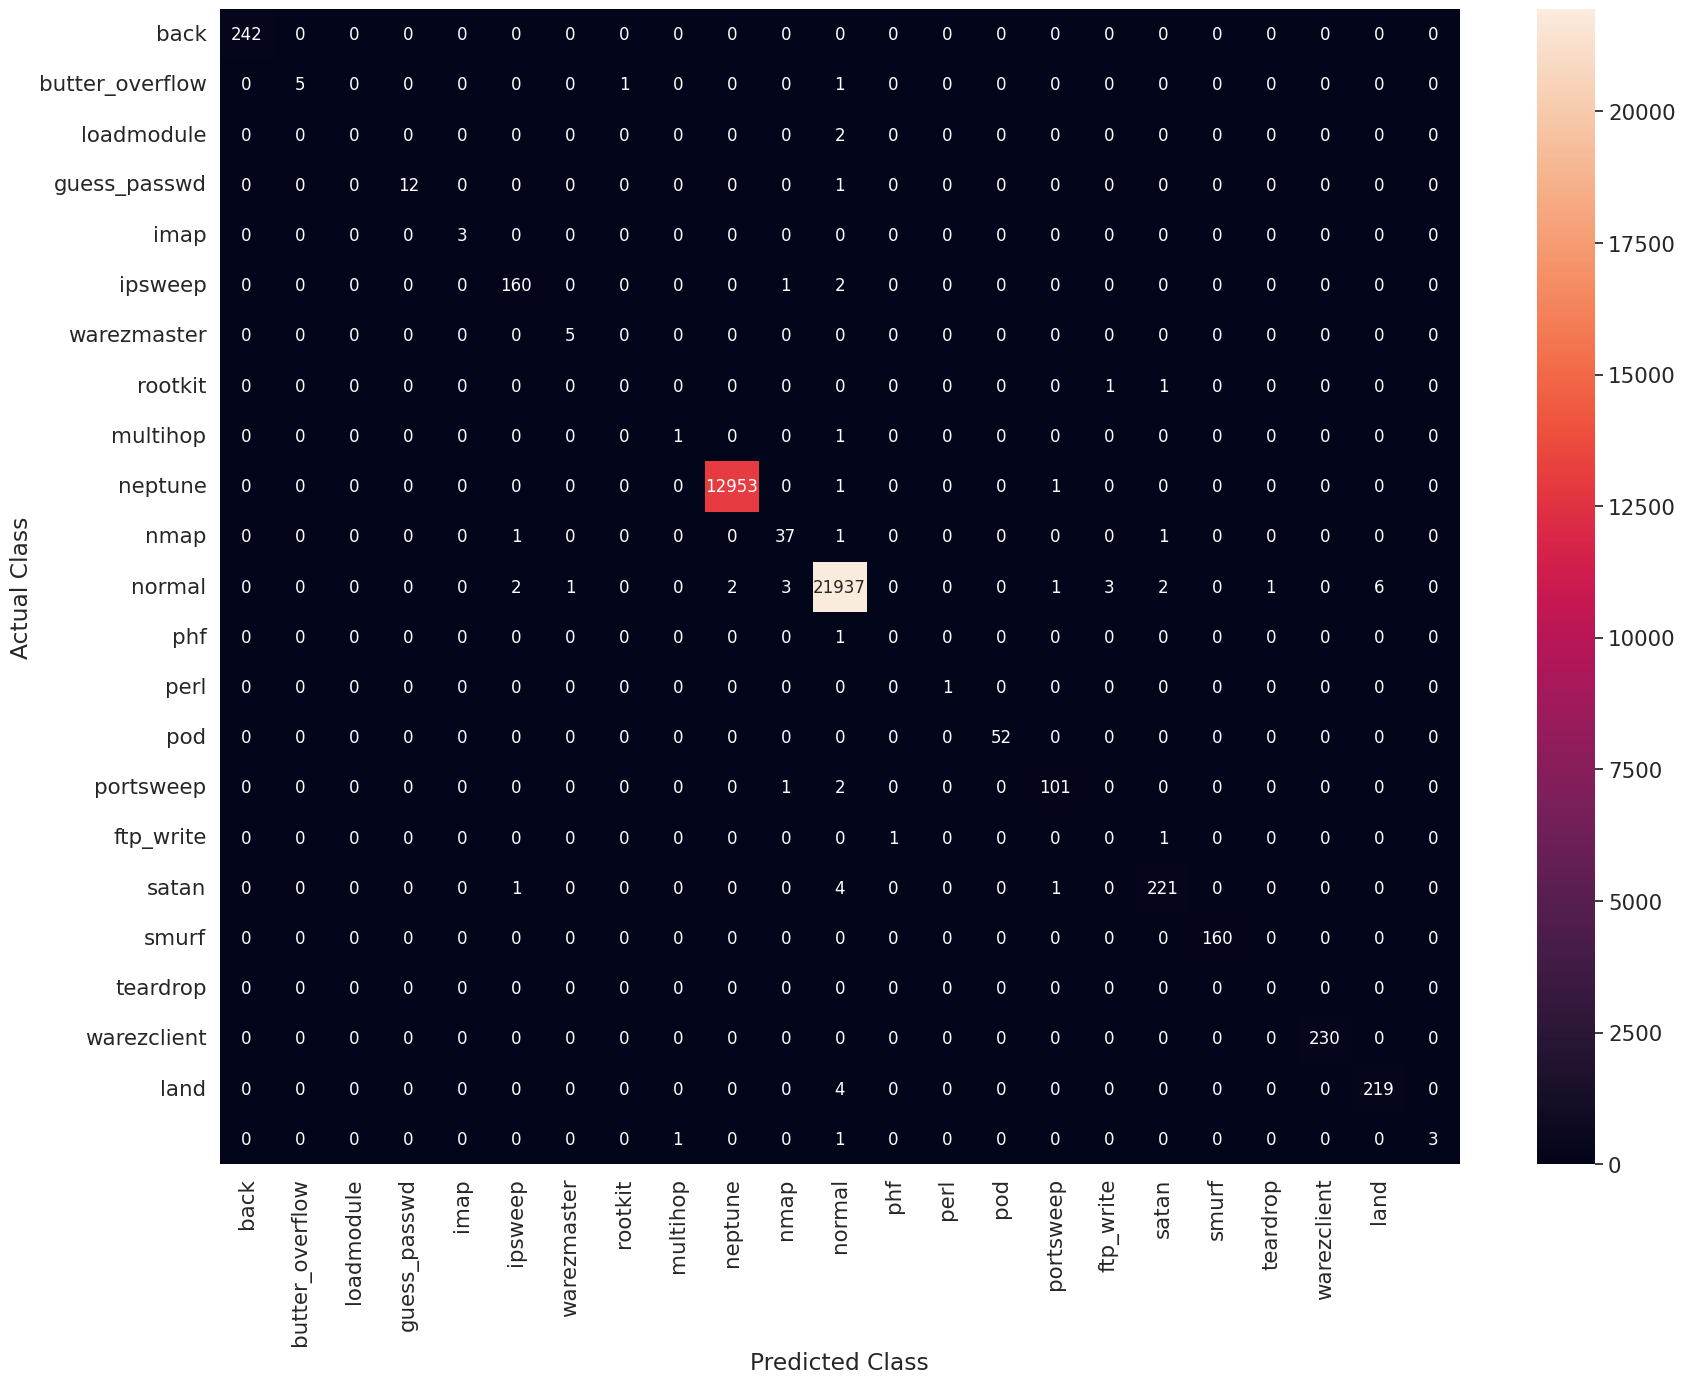

Precision score is:
0.9985015347855096
Recall score is:
0.9984888864466852
F1-score is:
0.9984813922127245


In [ ]:
decision_tree_results2_tr, decision_tree_results2_test = model(decision_tree_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                       min_samples_split=5)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 50, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9981499931871236



In [ ]:
dt_gs = decision_tree_grid.best_estimator_
y_tr_pred = dt_gs.predict(X_train_2.toarray())
y_test_pred = dt_gs.predict(X_test_2.toarray())
dt_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
dt_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
decision_tree_results2_tr

{'precision': 0.9998565078200037,
 'recall': 0.9998534650926375,
 'f1_score': 0.9998542575538694}

In [ ]:
dt_tpr_fpr_train

{'tp': 65861, 'tpr': 0.9998026535507181, 'fp': 0, 'fpr': 0.0}

In [ ]:
decision_tree_results2_test

{'precision': 0.9985015347855096,
 'recall': 0.9984888864466852,
 'f1_score': 0.9984813922127245,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
dt_tpr_fpr_test

{'tp': 21937,
 'tpr': 0.9990436287457874,
 'fp': 21,
 'fpr': 0.0014543943486391025}

In [ ]:
joblib.dump(decision_tree_grid.best_estimator_,MODELS_DIR / 'dt2.pkl')

['dt2.pkl']

<h5> Observation from DT-2 Classifier :- </h5>
    
    
- The Decision Tree Classifier was able to classify points with a high f1 score of ~0.9986 which is
similar to the performance of the 1st Decision Tree Classifier.


- True Postives = 21935


- TPR = 0.9989


- False Positives = 13


- FPR = 0.00090


- This DT Classifier has comparatively lower TPR and FPR than DT-1 model.

<h2> Model_2 :- Random Forest  </h2>

In [ ]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Completed
Time taken: 0:58:50.830658
Prediction on test data:
Completed
Time taken: 0:00:00.506187
Performance metrics:
Confusion Matrix is:


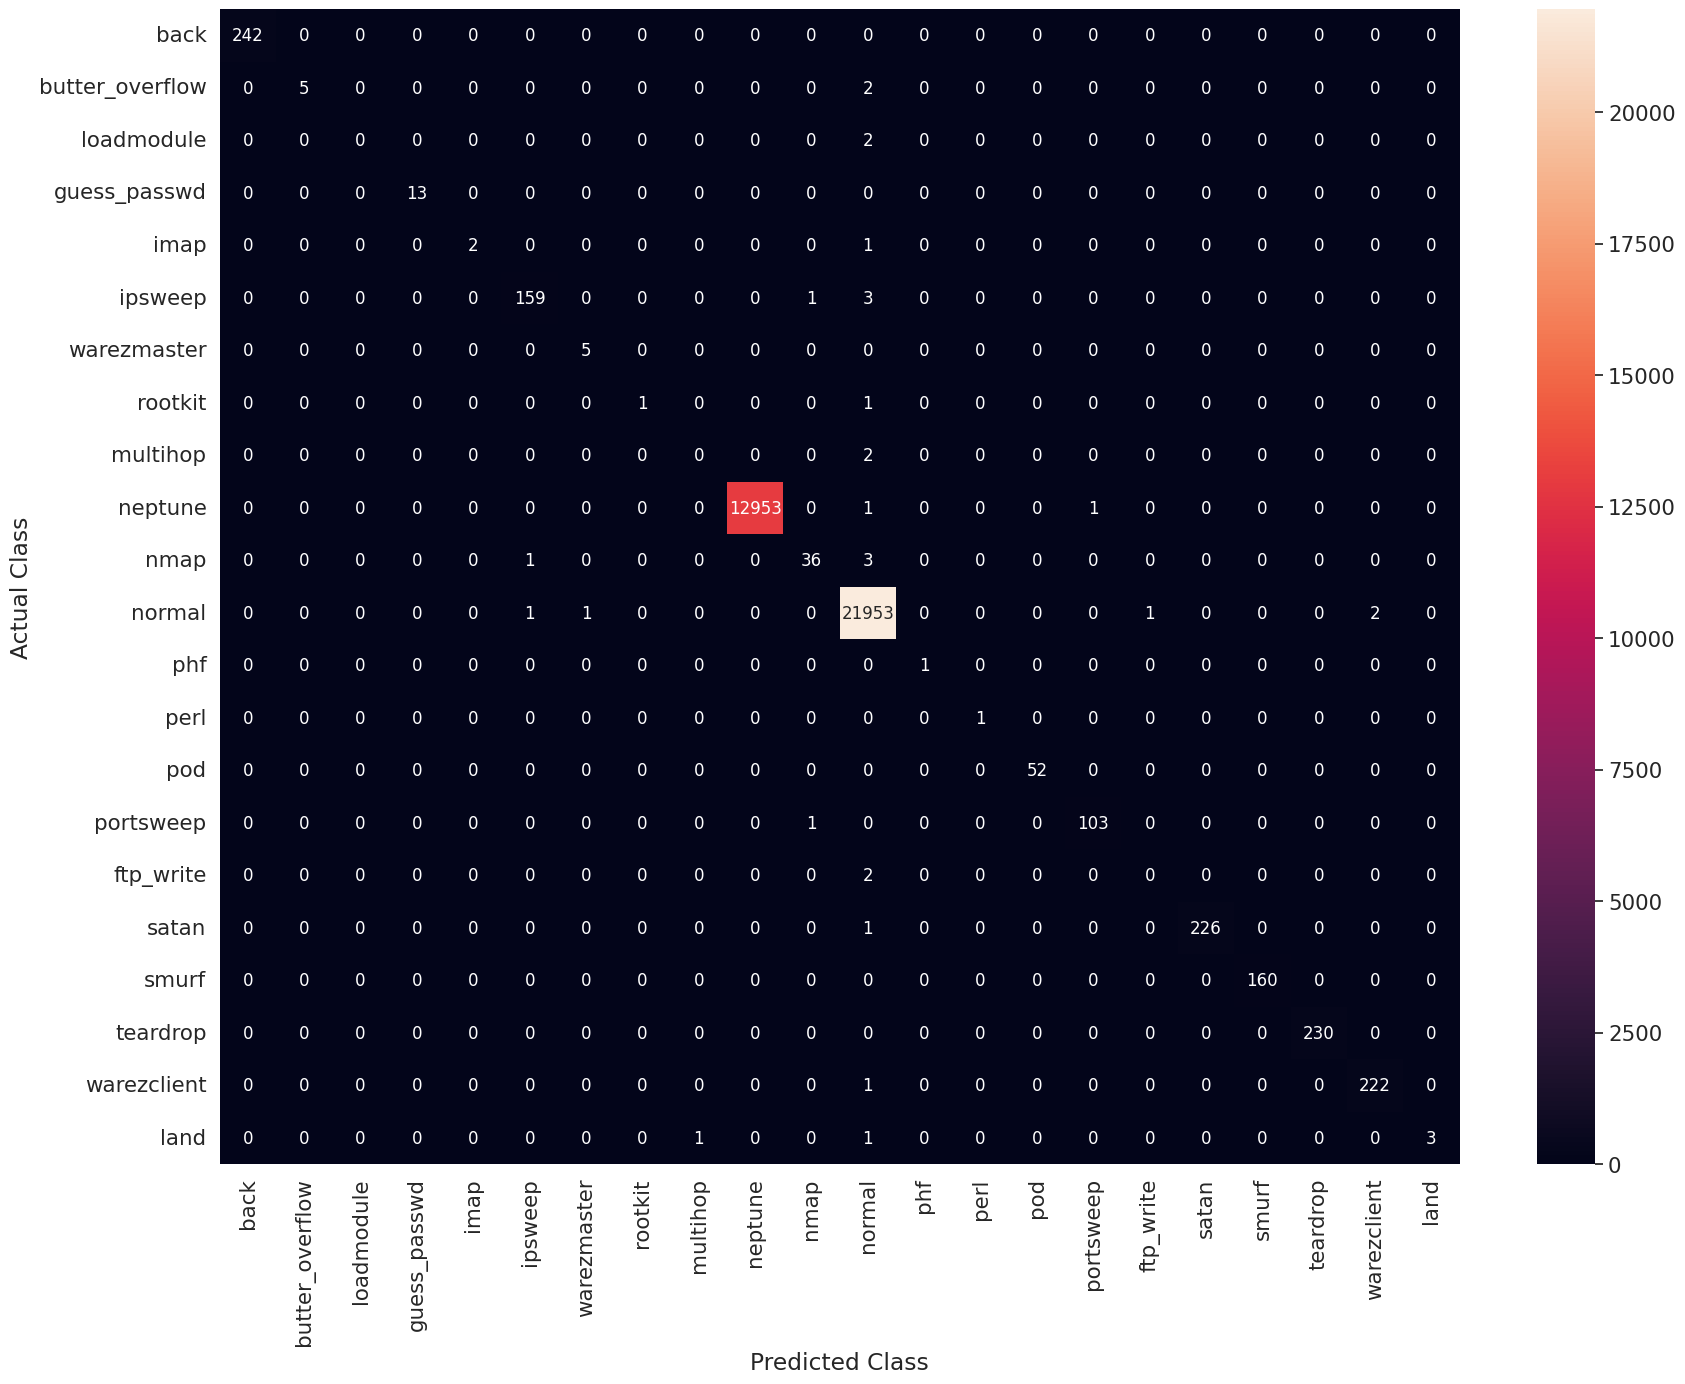

Precision score is:
0.9990674819484968
Recall score is:
0.9991757562436464
F1-score is:
0.9991008358499083


In [ ]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [ ]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(class_weight='balanced', max_depth=500,
                       min_samples_split=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 500, 'min_samples_split': 10, 'n_estimators': 100}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9991024722663605



In [ ]:
rf_gs = rf_grid.best_estimator_
y_tr_pred = rf_gs.predict(X_train_2.toarray())
y_test_pred = rf_gs.predict(X_test_2.toarray())
rf_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
rf_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
rf_grid_results_tr

{'precision': 0.999945626041311,
 'recall': 0.999945049409739,
 'f1_score': 0.9999451944647822}

In [ ]:
rf_tpr_fpr_train

{'tp': 65868, 'tpr': 0.9999089170234083, 'fp': 0, 'fpr': 0.0}

In [ ]:
rf_grid_results_test

{'precision': 0.9990674819484968,
 'recall': 0.9991757562436464,
 'f1_score': 0.9991008358499083,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [ ]:
rf_tpr_fpr_test

{'tp': 21953,
 'tpr': 0.9997722925585208,
 'fp': 20,
 'fpr': 0.0013851374748943832}

In [ ]:
joblib.dump(rf_grid.best_estimator_, MODELS_DIR / 'rf2.pkl')

['rf2.pkl']

<h5> Observation from RF_2 Classifier :- </h5>
    
    
- This RF Classifier has a lower f1-score(0.9990) compared to the RF_1 Classifier.


- True Postives = 21956


- TPR = 0.9999


- False Positives = 22


- FPR = 0.0015


- This RF Classifer has a higher TPR and higher FPR than the RF_1 model, which indicates that adding new features have improved the classification of Good connections but has also increased the misclassification of Bad category connections by some amount.


- The no. of false positives are more than the DT_2 classifier which is a Drawback of this model.

<h2> Model_3 :- XG Boost </h2>

- We will apply the XG Boost classifier on  the same dataset and check if it shows any improvement.

In [86]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
y_train = le.fit_transform(Y_train)
y_test = le.fit_transform(Y_test)
xgb = XGBClassifier(objective='multi:softprob', n_jobs=-1)
xgb_grid = RandomizedSearchCV(xgb, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

time: 10.5 ms (started: 2023-12-15 16:40:24 +05:30)


Fitting the model and prediction on train data:
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Completed
Time taken: 229.32 secs
Prediction on test data:
Completed
Time taken: 0.13 secs
[ 9 11  9 ... 11  9  9]
Performance metrics:
Confusion Matrix is:


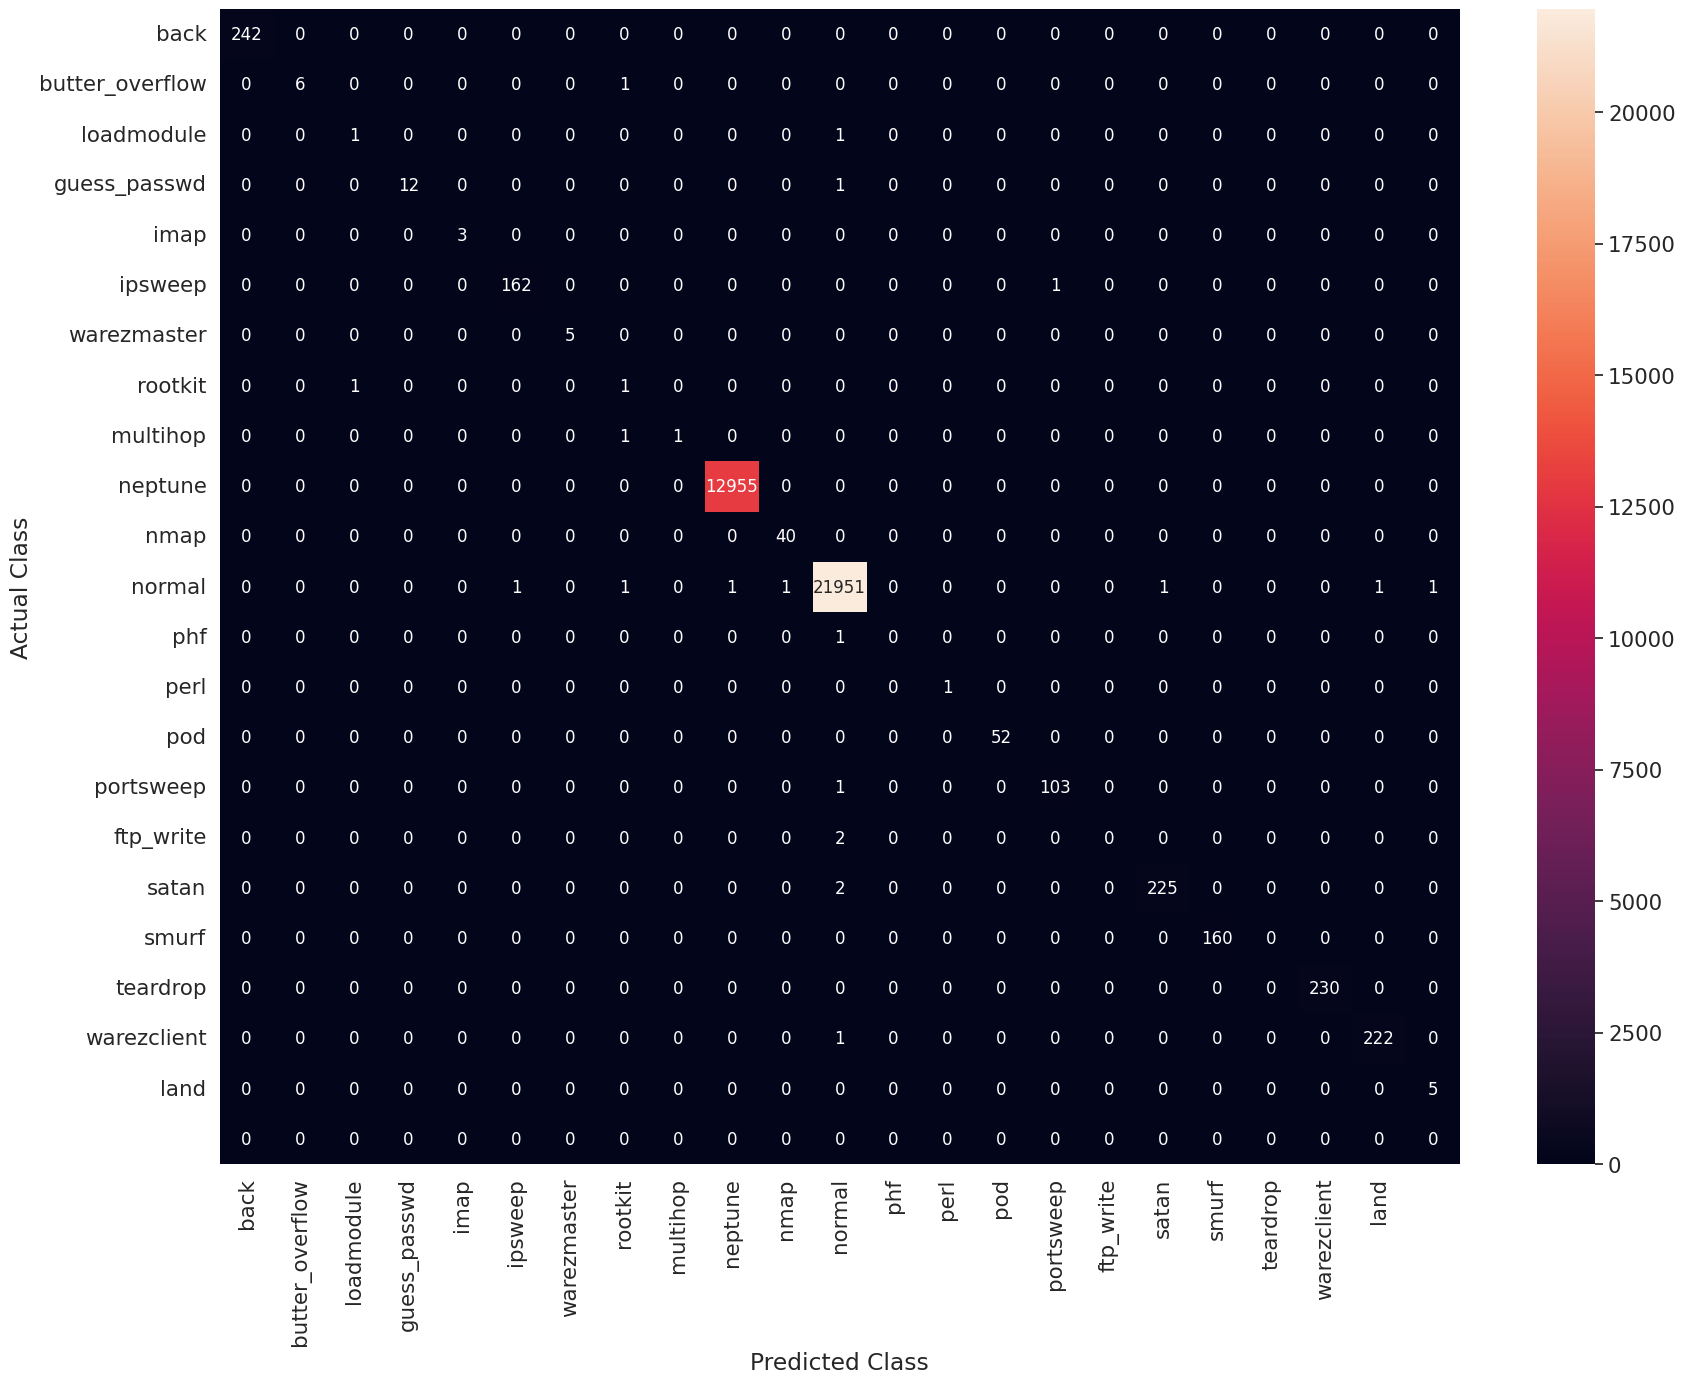

Precision score is:
0.9868813600659831
Recall score is:
0.9868945242739786
F1-score is:
0.9868792698204497
time: 3min 50s (started: 2023-12-15 16:40:25 +05:30)


In [87]:
xgb_grid_results_tr, xgb_grid_results_test = model(xgb_grid, X_train_2.toarray(), y_train, X_test_2.toarray(), y_test)

In [ ]:
print_grid_search_attributes(xgb_grid)

In [ ]:
xgb_gs = xgb_grid.best_estimator_
y_tr_pred = xgb_gs.predict(X_train_2.toarray())
y_test_pred = xgb_gs.predict(X_test_2.toarray())
xgb_tpr_fpr_train = tpr_fpr_func(Y_train, y_tr_pred)
xgb_tpr_fpr_test = tpr_fpr_func(Y_test, y_test_pred)

In [ ]:
xgb_grid_results_tr

In [ ]:
xgb_tpr_fpr_train

In [ ]:
xgb_grid_results_test

In [ ]:
xgb_tpr_fpr_test

In [ ]:
joblib.dump(xgb_grid.best_estimator_, MODELS_DIR / 'xgb2_gs.pkl')

<h5> Observation from XGBoost_2 Classifier :- </h5>
    
    
- This XG Boost Classifier was able to classify points with better accuracy of ~99.94 and high f1 score of ~0.9994 which is
similar to the performance of the 1st XGB Classifier.


- True Postives = 21955


- TPR = 0.9998


- False Positives = 12


- FPR = 0.00083


- This XGB Classifier has the highest TPR of (99.98%), but the FPR(0.00083) is same as the XGB1 model(0.0008).

<h3> Important Observation from the above 3 models:- </h3>

    
- From the performance scores we have obtained from the above 3 models, we can conclude that adding new features has increased the TPR score as the no. correct classification of "Normal" class points has increased, but no significant improvement has been obtained on the FPR score for all the 3 models which is a drawback.

<h2> Summarizing Results of Multiclass Classification problem:- </h2>

In [88]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model', 'Train f1-score', 'Train TPR', 'Train FPR', 'Test f1-score', 'Test TPR', 'Test FPR']
x.add_row(['Naive Bayes','0.9671','99.40%','5.13%','0.9679','99.34%','4.91%'])
x.add_row(['Logistic Regression','0.9813','99.81%','2.95%','0.9819','99.81%','2.76%'])
x.add_row(['Support Vector Machine','0.9967','99.87%','0.48%','0.9966','99.87%','0.43%'])
x.add_row(['Decision Tree - 1','0.9997','99.96%','0.0%','0.9986','99.90%','0.13%'])
x.add_row(['Random Forest - 1','0.9999','99.98%','0.0%','0.9992','99.98%','0.13%'])
x.add_row(['XG Boost - 1','0.9999','100.0%','0.0%','0.9994','99.98%','0.083%'])
x.add_row(['Decision Tree - 2','0.9998','99.97%','0.0%','0.9986','99.89%','0.09%'])
x.add_row(['Random Forest - 2','0.9999','99.99%','0.0%','0.9990','99.99%','0.15%'])
x.add_row(['XG Boost - 2','0.9999','99.99%','0.0%','0.9994','99.98%','0.083%'])

print(x)

+------------------------+----------------+-----------+-----------+---------------+----------+----------+
|         Model          | Train f1-score | Train TPR | Train FPR | Test f1-score | Test TPR | Test FPR |
+------------------------+----------------+-----------+-----------+---------------+----------+----------+
|      Naive Bayes       |     0.9671     |   99.40%  |   5.13%   |     0.9679    |  99.34%  |  4.91%   |
|  Logistic Regression   |     0.9813     |   99.81%  |   2.95%   |     0.9819    |  99.81%  |  2.76%   |
| Support Vector Machine |     0.9967     |   99.87%  |   0.48%   |     0.9966    |  99.87%  |  0.43%   |
|   Decision Tree - 1    |     0.9997     |   99.96%  |    0.0%   |     0.9986    |  99.90%  |  0.13%   |
|   Random Forest - 1    |     0.9999     |   99.98%  |    0.0%   |     0.9992    |  99.98%  |  0.13%   |
|      XG Boost - 1      |     0.9999     |   100.0%  |    0.0%   |     0.9994    |  99.98%  |  0.083%  |
|   Decision Tree - 2    |     0.9998     |   

- All the models have very close performance scores on train and test data, thus they are not OVERFITTING.

<h3> - The model XG Boost_1 is our best model for intrusion detection as it has highest Test f1-score 0.9994 and TPR 99.98%  as well as the least FPR of 0.08%. </h3>

# Conclusion :-

### For Multiclass Classification:-
    

- The model XG Boost_1 is our best model for intrusion detection as it has highest f1-score 0.9994 and TPR 99.98% as well as the least FPR of 0.08%.

